In [1]:
import os
import sys
import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from pprint import pprint as pprint

from pathlib import Path

In [2]:
# import requests
# import json

# def slack_notify(message):
#     webhook_url = ''

#     text = message

#     requests.post(webhook_url, data = json.dumps({
#         "text": text
#     }));
    
# # slack_notify('test')

In [3]:

# class Graph:
#     def initialize_rcparams():
# #         plt.style.use('default')
#         plt.rcParams['xtick.direction'] = 'in'
#         plt.rcParams['ytick.direction'] = 'in'
#         plt.gca().yaxis.set_ticks_position('left') #gca = get current axis 現在の（直前に操作した）軸を取得

In [2]:
#Timesフォントを使うために必要
#TIMES.ttfは別途ダウンロード
import matplotlib.font_manager as font_manager

# font_path = '/mnt/workspace/font/TIMES.ttf'
font_path = '../TIMES2.ttf'

size = 18
prop = font_manager.FontProperties(fname=font_path, size=size)
prop_mini = font_manager.FontProperties(fname=font_path, size=14)
marker_list = ["o", "^", "s", "*", "p", "P", "x", "D", "d", "<", ">"]
line_styles = ["solid", "dashed", "dashdot", "dotted"]

In [8]:
BASE_DIR = Path('../Pointnet_Pointnet2_pytorch')

root = BASE_DIR / "data/modelnet40_normal_resampled/"
catfile = os.path.join(root, 'modelnet40_shape_names.txt')

cat = [line.rstrip() for line in open(catfile)]
print("cat:", cat, "\n")
classes = dict(zip(cat, range(len(cat))))
print("classes:" , classes , "\n")

RESULT_DIR = BASE_DIR/'../Mywork/Results'
FIGURE_DIR = RESULT_DIR/'Figures'
FILE_DIR = RESULT_DIR/'Files'

cat: ['airplane', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'car', 'chair', 'cone', 'cup', 'curtain', 'desk', 'door', 'dresser', 'flower_pot', 'glass_box', 'guitar', 'keyboard', 'lamp', 'laptop', 'mantel', 'monitor', 'night_stand', 'person', 'piano', 'plant', 'radio', 'range_hood', 'sink', 'sofa', 'stairs', 'stool', 'table', 'tent', 'toilet', 'tv_stand', 'vase', 'wardrobe', 'xbox'] 

classes: {'airplane': 0, 'bathtub': 1, 'bed': 2, 'bench': 3, 'bookshelf': 4, 'bottle': 5, 'bowl': 6, 'car': 7, 'chair': 8, 'cone': 9, 'cup': 10, 'curtain': 11, 'desk': 12, 'door': 13, 'dresser': 14, 'flower_pot': 15, 'glass_box': 16, 'guitar': 17, 'keyboard': 18, 'lamp': 19, 'laptop': 20, 'mantel': 21, 'monitor': 22, 'night_stand': 23, 'person': 24, 'piano': 25, 'plant': 26, 'radio': 27, 'range_hood': 28, 'sink': 29, 'sofa': 30, 'stairs': 31, 'stool': 32, 'table': 33, 'tent': 34, 'toilet': 35, 'tv_stand': 36, 'vase': 37, 'wardrobe': 38, 'xbox': 39} 



## 遺伝アルゴリズム実行中の適応値の推移

[32, 64, 128, 256, 512]
['−14', '−12', '−10', '−8', '−6', '−4', '−2', '0']


/tmp/ipykernel_1375/489420536.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, font_properties=prop_mini)


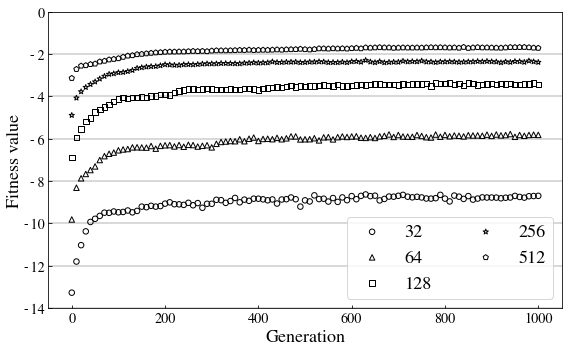

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Sofa/Fitness_value_for_each_generation_of_Sofa.pdf
[32, 64, 128, 256, 512]
['−14', '−12', '−10', '−8', '−6', '−4', '−2', '0']


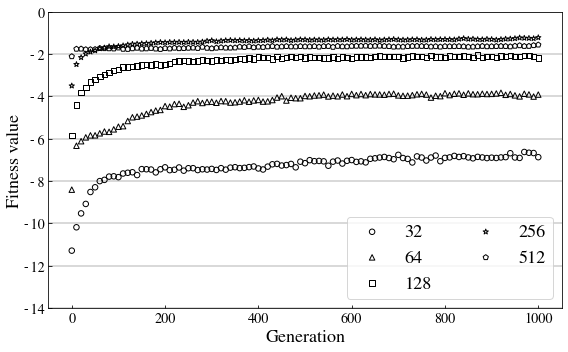

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Person/Fitness_value_for_each_generation_of_Person.pdf
[32, 64, 128, 256, 512]
['−14', '−12', '−10', '−8', '−6', '−4', '−2', '0']


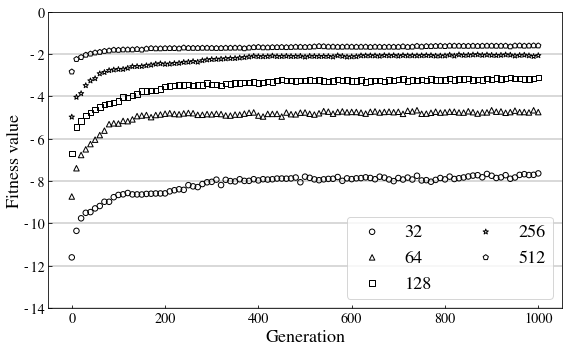

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Chair/Fitness_value_for_each_generation_of_Chair.pdf


In [16]:
num_list = [1980, 1510, 615]
class_list = ['Sofa', 'Person', 'Chair']
numpoint_list = [2**i for i in range(5, 10, 1)]

for num, class1 in zip(num_list, class_list):
    log_list = os.listdir(FILE_DIR/'seed0'/'GA_downsampling'/'log')
    log_list = [s for s in log_list if 'data'+str(num) in s]
    log_list.sort()
    
    fig , ax1 = plt.subplots(figsize=(8, 5), tight_layout=True)

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

#     plt.title("Fitness value for each generation of "+class1, fontproperties=prop)

    ax1.set_xlabel('Generation', fontproperties=prop)
    ax1.set_ylabel('Fitness value', fontproperties=prop)
    label = numpoint_list
    print(label)

    x = np.arange(log_df.index.size)
    _max = 0
    for i in range(5):
        select_log = log_list[i]
        log_df = pd.read_csv(FILE_DIR/'seed0'/'GA_downsampling'/'log'/select_log)

        y1 = -log_df.iloc[:,0]
        ax1.scatter(x[::10], y1[::10], label= label[i], s =30, color="Black", marker=marker_list[i], facecolor="None")
        _max = max(max(y1), _max)
#     ax1.set_ylim( -0.1, _max+0.5)
    ax1.set_ylim( -13.7, 0)

    fig.canvas.draw()
    x_labels = [item.get_text() for item in ax1.get_xticklabels()]
    y_labels = [item.get_text() for item in ax1.get_yticklabels()]
    print(y_labels)
    ax1.set_xticklabels(x_labels, font_properties=prop_mini)
    ax1.set_yticks(np.arange(-14, 2, 2))
    ax1.set_yticklabels(y_labels, font_properties=prop_mini)
    handler1, label1 = ax1.get_legend_handles_labels()
    ax1.legend(handler1, label1, loc="lower right", prop=prop, ncol=2)
    plt.grid(color='black', linewidth=0.3, axis='y')
    #何故か軸にマイナスが表示されないのでテキストで無理やり追加した
    #フォントをこだわらなければ表示される
    for i in range(4):
        ax1.text(-90, -i*2-2.2, "-", font_properties=prop_mini)
    for i in range(3):
        ax1.text(-103, -i*2-10.2, "-", font_properties=prop_mini)

    plt.show()
    
    figure_category = Path('Thesis/'+class1) #どういうfigureか
    ext = ".pdf"
    #-------------------------------------
    save_dir = FIGURE_DIR / figure_category
    # print(save_dir)
    save_dir.mkdir(exist_ok=True, parents=True)
    timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
    # print(timestr)
#     figure_name = ax1.get_title()+ ext
    figure_name = "Fitness_value_for_each_generation_of_" + class1 + ext
#     fig.savefig(save_dir/figure_name)
    print("Saved in:", save_dir/figure_name)
    plt.close()
# plt.close()

## 適応値と正解率の対応

/tmp/ipykernel_1375/1036643791.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, font_properties=prop_mini)
/tmp/ipykernel_1375/1036643791.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(y_labels, font_properties=prop_mini)


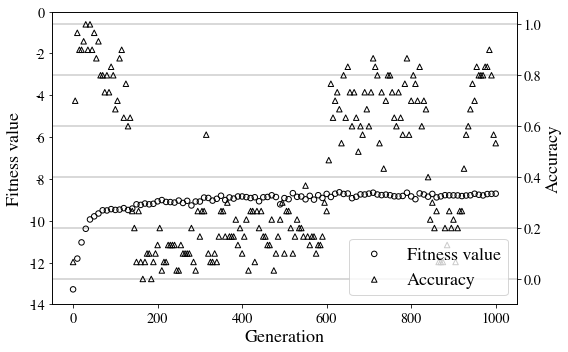

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Sofa/32_points.pdf


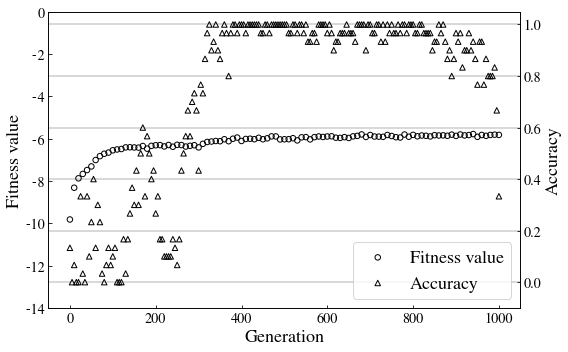

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Sofa/64_points.pdf


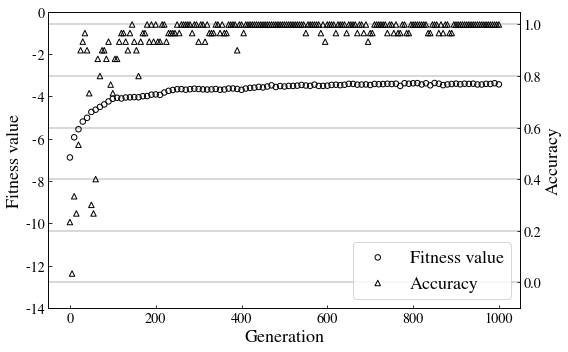

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Sofa/128_points.pdf


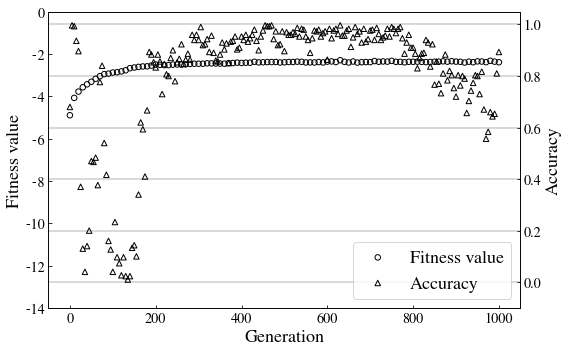

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Sofa/256_points.pdf


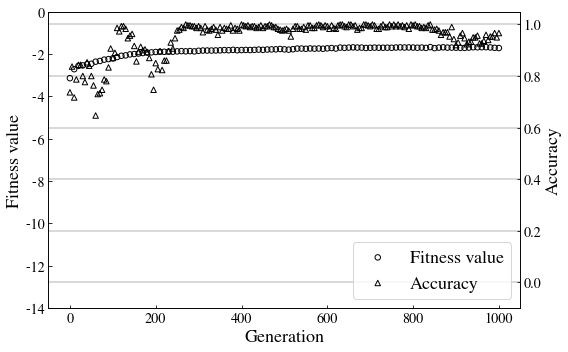

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Sofa/512_points.pdf


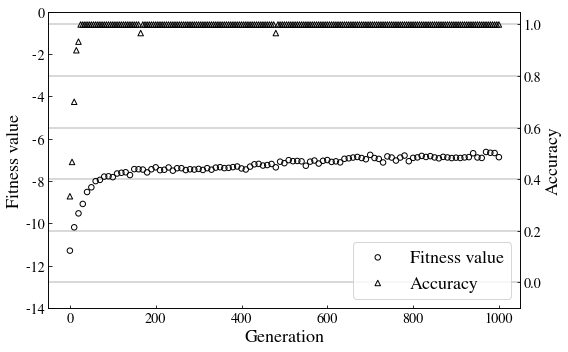

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Person/32_points.pdf


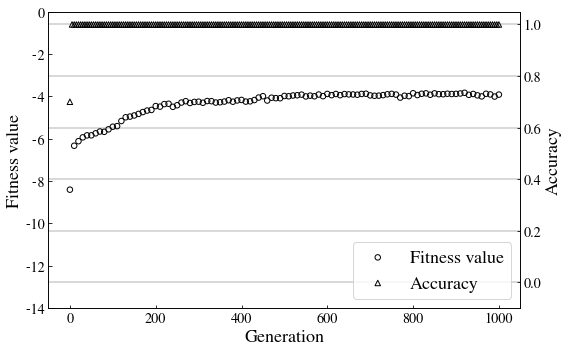

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Person/64_points.pdf


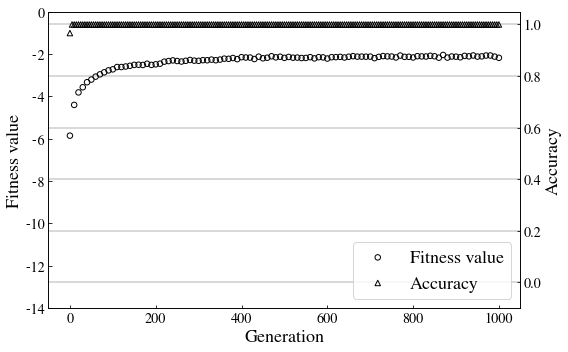

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Person/128_points.pdf


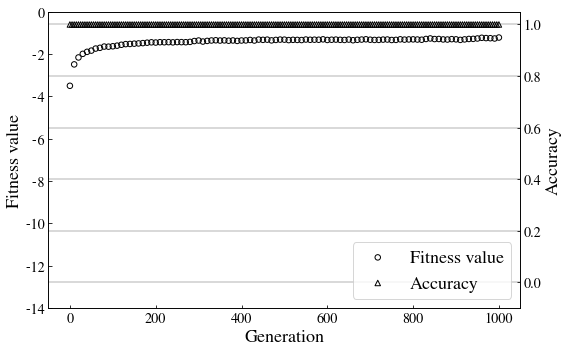

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Person/256_points.pdf


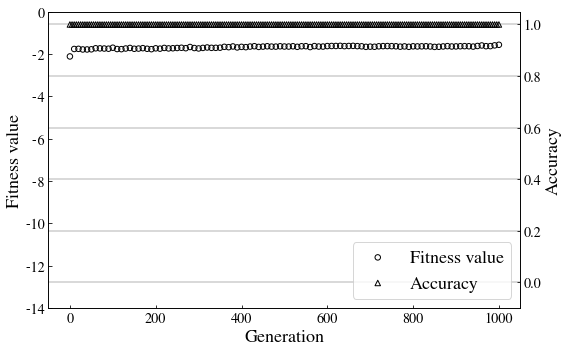

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Person/512_points.pdf


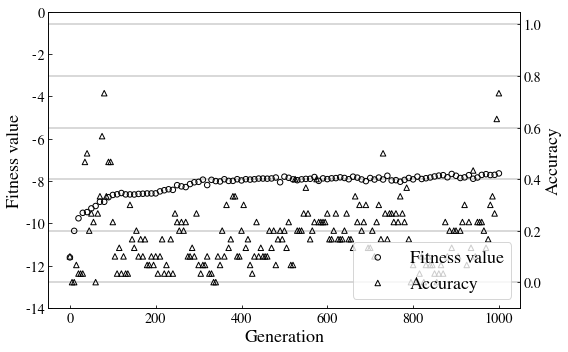

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Chair/32_points.pdf


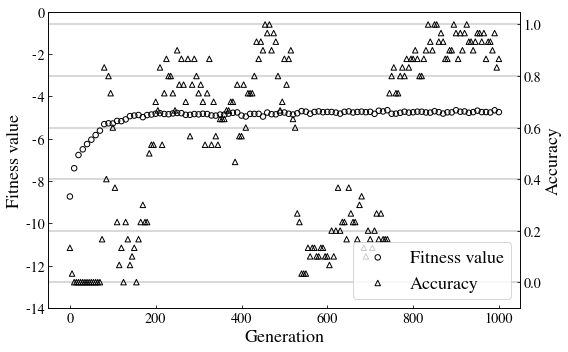

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Chair/64_points.pdf


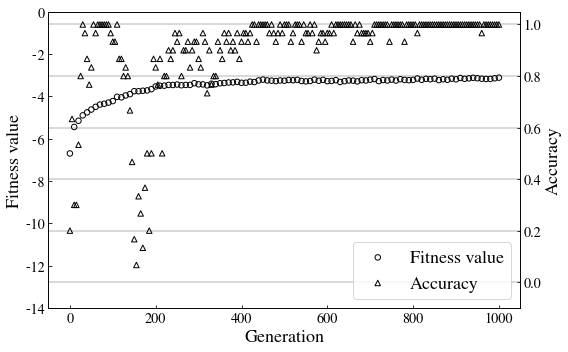

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Chair/128_points.pdf


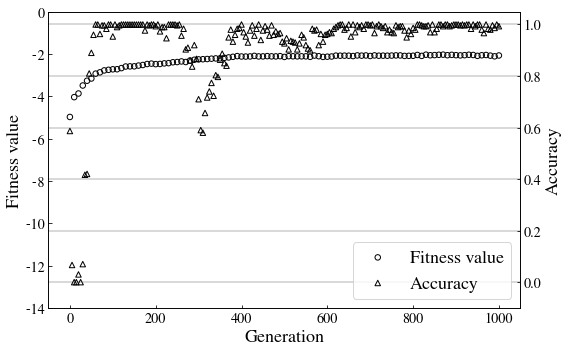

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Chair/256_points.pdf


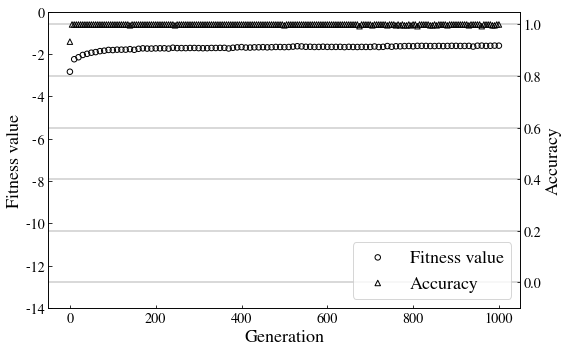

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Chair/512_points.pdf


In [9]:
num_list = [1980, 1510, 615]
class_list = ['Sofa', 'Person', 'Chair']
numpoint_list = [2**i for i in range(5, 10, 1)]

for num, class1 in zip(num_list, class_list):
    log_list = os.listdir(FILE_DIR/'seed0'/'GA_downsampling'/'log')
    log_list = [s for s in log_list if 'data'+str(num) in s]
    log_list.sort()
    
    for i in range(5):
        select_log = log_list[i]
        log_df = pd.read_csv(FILE_DIR/'seed0'/'GA_downsampling'/'log'/select_log)
        fig , ax1 = plt.subplots(figsize=(8, 5), tight_layout=True)
        ax2 = ax1.twinx()

        plt.rcParams['xtick.direction'] = 'in'
        plt.rcParams['ytick.direction'] = 'in'
        ax1.set_xlabel('Generation', fontproperties=prop)
        ax1.set_ylabel('Fitness value', fontproperties=prop)
        ax2.set_ylabel('Accuracy', fontproperties=prop)

        label = ['Fitness value', 'Accuracy']
        x = np.arange(log_df.index.size)
        y1 = -log_df.iloc[:,0]
        ax1.scatter(x[::10], y1[::10], label= label[0], s =30, color="Black", marker=marker_list[0], facecolor="None")
        y2 = log_df.iloc[:,1]
        ax2.scatter(x[::5], y2[::5], label= label[1], s =30, color="Black", marker=marker_list[1], facecolor="None")

        ax1.set_ylim( -13.7, 0)
        ax2.set_ylim(-0.1, 1.05)

        fig.canvas.draw()
        x_labels = [item.get_text() for item in ax1.get_xticklabels()]
        y_labels = [item.get_text() for item in ax1.get_yticklabels()]

        ax1.set_xticklabels(x_labels, font_properties=prop_mini)
        ax1.set_yticks(np.arange(-14, 2, 2))
        ax1.set_yticklabels(y_labels, font_properties=prop_mini)
        
        #何故か軸にマイナスが表示されないのでテキストで追加した
        #フォントをこだわらなければ表示される
        for j in range(4):
            ax1.text(-90, -j*2-2.2, "-", font_properties=prop_mini)
        for j in range(3):
            ax1.text(-103, -j*2-10.2, "-", font_properties=prop_mini)

        y_labels = [item.get_text() for item in ax2.get_yticklabels()]
        ax2.set_yticklabels(y_labels, font_properties=prop_mini)
        handler1, label1 = ax1.get_legend_handles_labels()
        handler2, label2 = ax2.get_legend_handles_labels()
        plt.grid(color='black', linewidth=0.3, axis='y')
        ax2.legend(handler1 + handler2, label1 + label2, loc=4, prop=prop)
        plt.show()
        
        figure_category = Path('Thesis/'+class1) #どういうfigureか
        ext = ".pdf"
        #-------------------------------------
        save_dir = FIGURE_DIR / figure_category
        # print(save_dir)
        save_dir.mkdir(exist_ok=True, parents=True)
        timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
        # print(timestr)
        figure_name = str(numpoint_list[i])+"_points"+ ext
#         fig.savefig(save_dir/figure_name)
        print("Saved in:", save_dir/figure_name)
        plt.close()

## ダウンサンプリング手法の比較

['minsize32_data1980_2021-12-28_11-55.csv']


/tmp/ipykernel_1375/2177400905.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, font_properties=prop_mini)


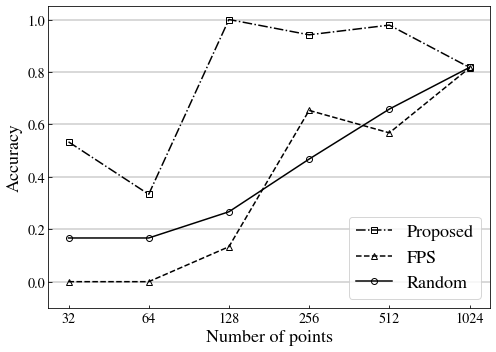

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Sofa/.pdf
['minsize32_data1510_2021-12-30_19-11.csv']


/tmp/ipykernel_1375/2177400905.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, font_properties=prop_mini)


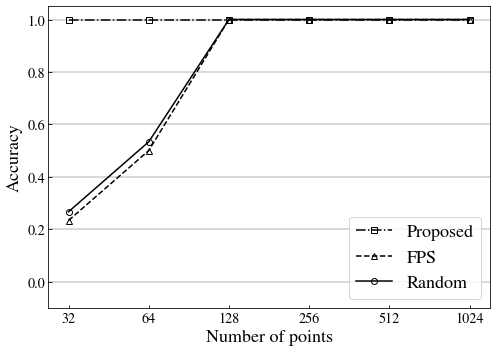

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Person/.pdf
['minsize32_data615_2022-01-05_12-29.csv']


/tmp/ipykernel_1375/2177400905.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, font_properties=prop_mini)


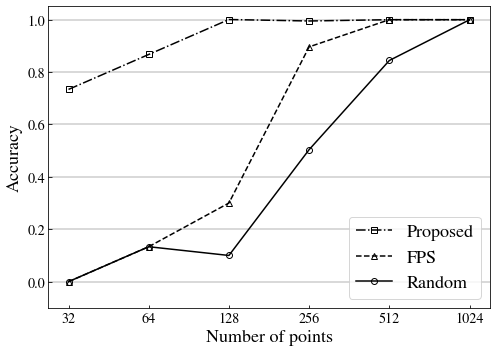

Saved in: ../Pointnet_Pointnet2_pytorch/../Mywork/Results/Figures/Thesis/Chair/.pdf


In [18]:
num_list = [1980, 1510, 615]
class_list = ['Sofa', 'Person', 'Chair']
numpoint_list = [2**i for i in range(5, 11, 1)]

for num, class1 in zip(num_list, class_list):
    data_idx = num
    result_dir = FILE_DIR/'downsampling'
    file_list = os.listdir(result_dir)
    file_list = [s for s in file_list if 'data'+str(data_idx) in s]
    file_list.sort()
    pprint(file_list)
    select_file = file_list[-1]  #データの数が増えてきたらここをちゃんと設定する
    file_df = pd.read_csv(result_dir/select_file)
    
    fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True)

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
#     plt.title("Accuracy for each sampling rate of "+class1, fontproperties=prop)

    ax.set_xlabel('Number of points', fontproperties=prop)
    ax.set_ylabel('Accuracy', fontproperties=prop)

    x = range(6)
    labels = ['Random', 'FPS', "Proposed"]

    for i in range(2, -1, -1):
        y = file_df.iloc[i,:]
        y = y[::-1]
        ax.plot(x, y, label= labels[i], color="Black", marker=marker_list[i], markerfacecolor="None", linestyle=line_styles[i])
        ax.set_ylim(-0.1, 1.05)

    fig.canvas.draw()
    x_labels = numpoint_list
    y_labels = [item.get_text() for item in ax.get_yticklabels()]

    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(x_labels, font_properties=prop_mini)
    ax.set_yticklabels(y_labels, font_properties=prop_mini)

    handler, label = ax.get_legend_handles_labels()
    ax.legend(handler, label, loc="lower right", prop=prop)
    plt.grid(color='black', linewidth=0.3, axis='y')

    plt.show()
    
    figure_category = Path('Thesis/'+class1) #どういうfigureか
    ext = ".pdf"
    #-------------------------------------
    save_dir = FIGURE_DIR / figure_category
    save_dir.mkdir(exist_ok=True, parents=True)
    timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
    figure_name = ax.get_title()+ ext
#     fig.savefig(save_dir/figure_name)
    print("Saved in:", save_dir/figure_name)
    plt.close()
# plt.close()

In [83]:
#汎用的に保存する場合

figure_category = Path('GA_downsampling/' + ax2.get_title()) #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / figure_category
# print(save_dir)
save_dir.mkdir(exist_ok=True, parents=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/GA_downsampling/Person: 512 points/2022-01-12_00-39.pdf


# これ以降は研究途中で取得した図。
# 修論には載せていないもの。

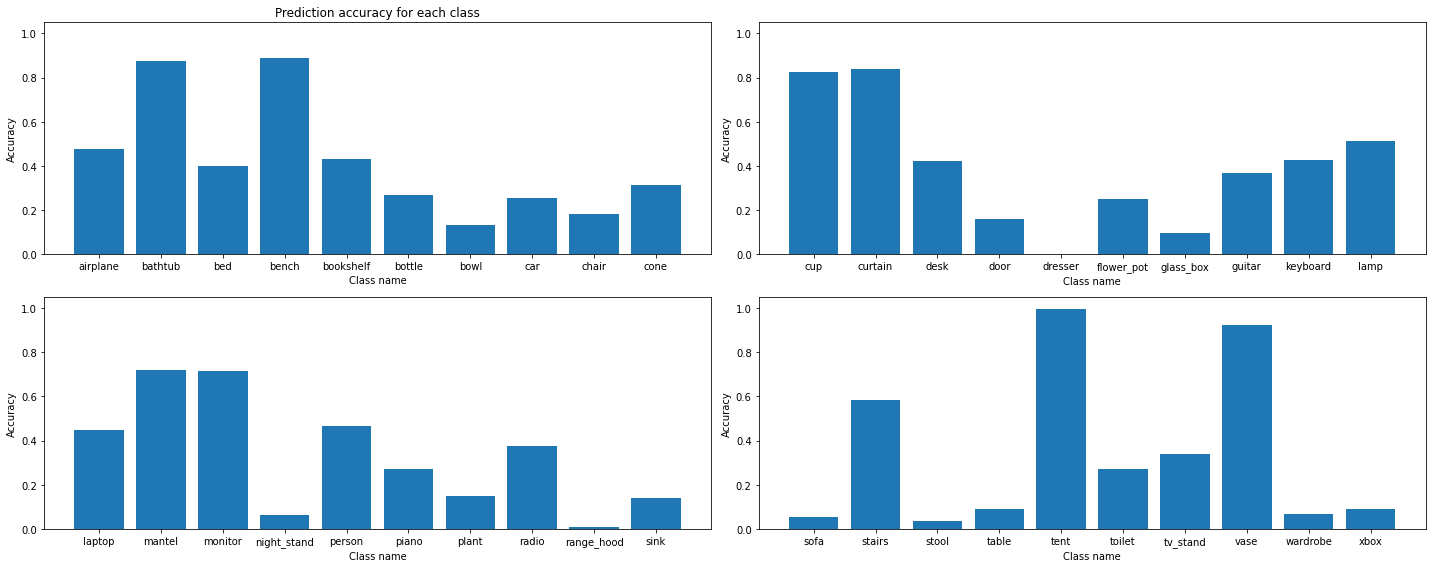

2021-10-31_17-38


In [58]:
fig = plt.figure(figsize=(20, 8), tight_layout=True)

ax1 = fig.add_subplot(221, title='Prediction accuracy for each class', ylabel='Accuracy', xlabel='Class name', ylim=(0, 1.05))
ax2 = fig.add_subplot(222, ylabel='Accuracy', xlabel='Class name', ylim=(0, 1.05))
ax3 = fig.add_subplot(223, ylabel='Accuracy', xlabel='Class name', ylim=(0, 1.05))
ax4 = fig.add_subplot(224, ylabel='Accuracy', xlabel='Class name', ylim=(0, 1.05))

ax1.bar(cat[:10], y[:10])
ax2.bar(cat[10:20], y[10:20])
ax3.bar(cat[20:30], y[20:30])
ax4.bar(cat[30:40], y[30:40])

plt.show()

timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
print(timestr)
figure_name = timestr + ".pdf"
fig.savefig(save_path/figure_name)
plt.close()

# 結果を読み込んで見る

## ベース正解率

In [229]:
#Path確認
pprint(os.listdir(RESULT_DIR))
pprint(os.listdir(RESULT_DIR/'Base_test_accuracy_seed0'))

['Base_test_accuracy_seed0', 'FeatureSelection_toZero_oneFeature', 'Graphs']
['2021-11-02_11-51.csv']


In [230]:
#内容確認
base_accuracy = pd.read_csv(RESULT_DIR/'Base_test_accuracy_seed0'/'2021-11-02_11-51.csv')
pprint(base_accuracy)

      total  airplane   bathtub  bed  bench  bookshelf    bottle  bowl  car  \
0  0.923168       1.0  0.989362  1.0    0.7   0.953342  0.958949   0.9  1.0   

      chair  ...      sofa  stairs  stool     table  tent    toilet  tv_stand  \
0  0.968254  ...  0.983146     0.9    0.8  0.880609  0.95  0.985714  0.941426   

      vase  wardrobe  xbox  
0  0.81666       0.7   0.8  

[1 rows x 41 columns]


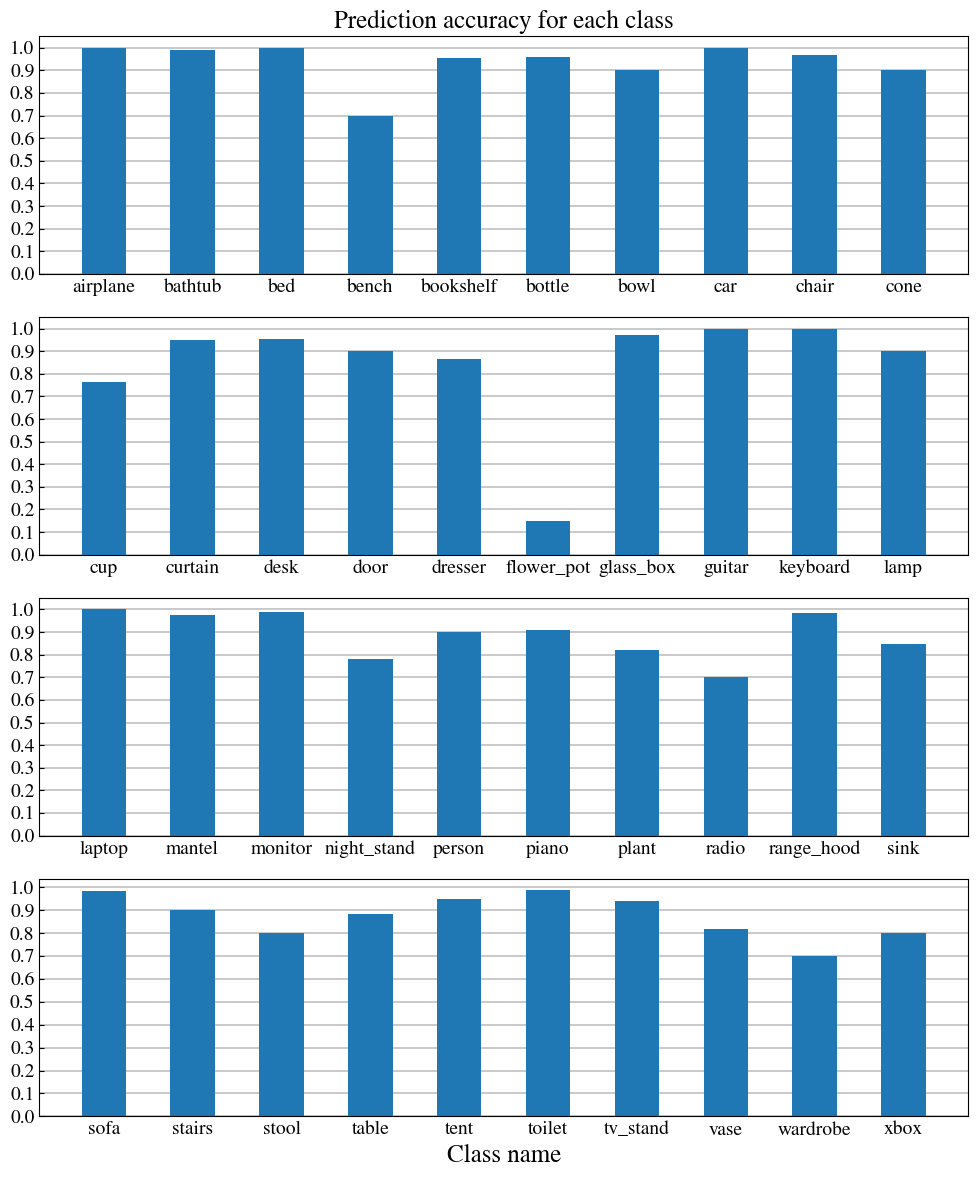

In [279]:
fig, axes= plt.subplots(4, 1, figsize=(10, 12), tight_layout=True)

axes[0].set_title('Prediction accuracy for each class', fontproperties=prop) 
axes[3].set_xlabel('Class name', fontproperties=prop)

for i in range(4):
    axes[i].bar(cat[10*i:10+10*i], base_accuracy[cat[10*i:10+10*i]].loc[0], width=0.5)
    axes[i].set_xticks(range(0,10))
    axes[i].set_xticklabels(cat[10*i:10+10*i], fontproperties=prop, fontsize=14)
    axes[i].set_yticks(np.round(np.arange(0, 1.05, 0.1), decimals=1))
    axes[i].set_yticklabels(np.round(np.arange(0, 1.05, 0.1), decimals=1), fontproperties=prop, fontsize=14)
    axes[i].grid(color='black', linewidth=0.3, axis="y")
    axes[i].set_axisbelow(True)

In [280]:
figure_name = 'BaseAccuracy' #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / Path(figure_name) 
# print(save_dir)
save_dir.mkdir(exist_ok=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/BaseAccuracy/2021-11-02_18-40.pdf


## 特徴選択の正解率

In [282]:
pprint(os.listdir(RESULT_DIR))
pprint(os.listdir(RESULT_DIR/'FeatureSelection_toZero_oneFeature'))

['Base_test_accuracy_seed0', 'FeatureSelection_toZero_oneFeature', 'Figures']
['2021-11-02_11-13.csv',
 '2021-11-04_11-22.csv',
 '2021-11-01_11-35.csv',
 '2021-11-04_11-27.csv']


In [283]:
df_read = pd.read_csv(RESULT_DIR/'FeatureSelection_toZero_oneFeature'/'2021-11-04_11-27.csv')
pprint(df_read)

         total  airplane   bathtub  bed  bench  bookshelf    bottle  bowl  \
0     0.923200       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
1     0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
2     0.924819       1.0  0.989362  1.0   0.70   0.953342  0.970854  0.90   
3     0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
4     0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
...        ...       ...       ...  ...    ...        ...       ...   ...   
1019  0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
1020  0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
1021  0.923507       1.0  0.978723  1.0   0.75   0.953342  0.950328  0.95   
1022  0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
1023  0.923184       1.0  0.989362  1.0   0.70   0.953342  0.970854  0.90   

      car     chair  ...      sofa  stairs  stool     table  tent    toilet

In [104]:
step = 1 / 2468

[0.916 0.918 0.92  0.922 0.924 0.926]


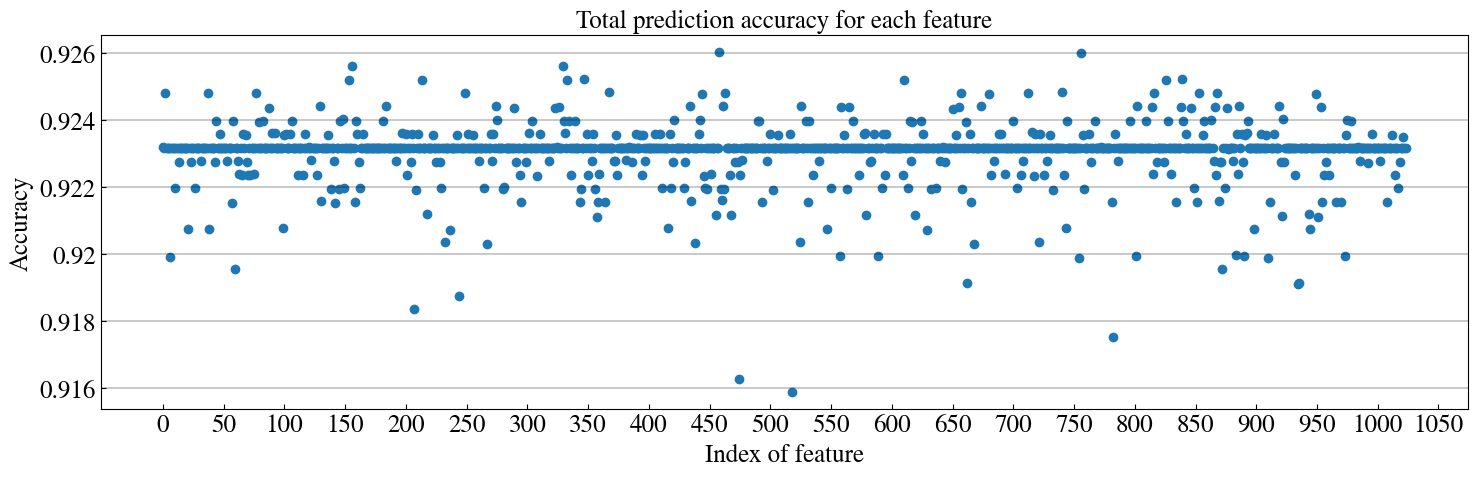

In [296]:
# base_accuracy = 0.923168
fig , ax = plt.subplots(figsize=(15, 5), tight_layout=True)

# plt.clf()
# plt.style.use('default')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['font.size'] = 14
# plt.gca().yaxis.set_ticks_position('left')
# axes[1,1] = fig.add_subplot(111, title='Difference in prediction accuracy from the base test , \
# Contribution of each feature', ylabel='Difference in mistake' , xlabel='No. of feature(100/1024)')

# plt.xlabel(fontproperties=prop)
ax.set_title('Total prediction accuracy for each feature', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Accuracy', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
ax.set_yticks(np.arange(0.916, 0.927, 0.002))
ax.set_yticklabels(np.arange(0.916, 0.927, 0.002), font_properties=prop)
print(ax.get_yticks())
ax.scatter(np.arange(1024), df_read['total'])
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

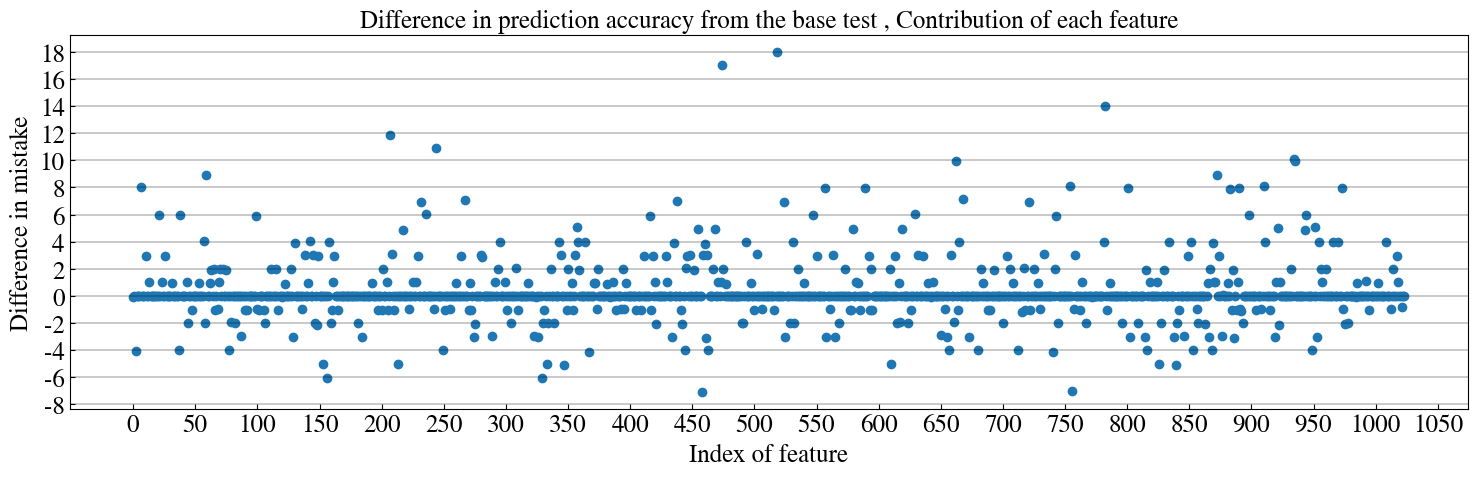

In [287]:
# base_accuracy = 0.923168
fig , ax = plt.subplots(figsize=(15, 5), tight_layout=True)

# plt.clf()
# plt.style.use('default')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['font.size'] = 14
# plt.gca().yaxis.set_ticks_position('left')
# axes[1,1] = fig.add_subplot(111, title='Difference in prediction accuracy from the base test , \
# Contribution of each feature', ylabel='Difference in mistake' , xlabel='No. of feature(100/1024)')

# plt.xlabel(fontproperties=prop)
ax.set_title('Difference in prediction accuracy from the base test , Contribution of each feature', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Difference in mistake', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
ax.set_yticks(np.arange(-10, 20, 2))
ax.set_yticklabels(np.arange(-10, 20, 2), font_properties=prop)
ax.scatter(np.arange(1024), (base_accuracy['total'].loc[0] - df_read['total'])/step)
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

In [305]:
a = 0.5
b = round(0.7)
print(b)

1


In [308]:
miss_arr = (base_accuracy['total'].loc[0] - df_read['total'])/step
miss_arr = miss_arr.to_numpy()
print(miss_arr)
print(type(miss_arr))
miss_arr = np.round(miss_arr)
print(miss_arr)

[-0.08067732  0.         -4.07420483 ... -0.83702723  0.
 -0.04033866]
<class 'numpy.ndarray'>
[-0.  0. -4. ... -1.  0. -0.]


In [340]:
pprint(np.unique(miss_arr, return_counts=True))
miss_arr_uni = np.unique(miss_arr, return_counts=True)
# miss_arr_uni[1][7] = 0
# pprint(miss_arr_uni)
print(np.sum(miss_arr_uni[0]*miss_arr_uni[1]))
# print(np.where(miss_arr > 0))
print("The number of features making a positive contribution", len(np.where(miss_arr > 0)[0]))
# slack_notify("The number of features making a positive contribution:" + str(len(np.where(miss_arr > 0)[0])))
print("The number of features making a negative contribution", len(np.where(miss_arr < 0)[0]))
print("Index of features making a positive contribution", np.where(miss_arr > 0)[0])
# slack_notify("Index of features making a positive contribution"+ str(np.where(miss_arr > 0)[0]))
print("Index of features making a negative contribution", np.where(miss_arr < 0)[0])

(array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.,  8.,  9., 10., 11., 12., 14., 17., 18.]),
 array([  2,   2,   7,  15,  24,  38,  69, 673,  56,  38,  34,  22,   9,
        10,   6,   9,   2,   3,   1,   1,   1,   1,   1]))
323.0
The number of features making a positive contribution 194
The number of features making a negative contribution 157
Index of features making a positive contribution [   6   10   13   21   23   26   31   38   43   53   57   59   62   63
   65   69   70   72   75   99  111  115  122  127  130  138  141  142
  145  149  158  161  162  192  201  204  207  208  217  225  228  229
  232  236  244  260  264  267  271  280  281  291  294  295  299  308
  318  336  343  344  350  353  356  357  358  359  364  371  372  374
  381  386  394  397  411  416  418  420  429  430  435  438  445  446
  448  451  455  459  460  462  467  468  471  473  474  475  477  493
  497  502  518  524  531  535  540  547  550  557  563  573  579  5

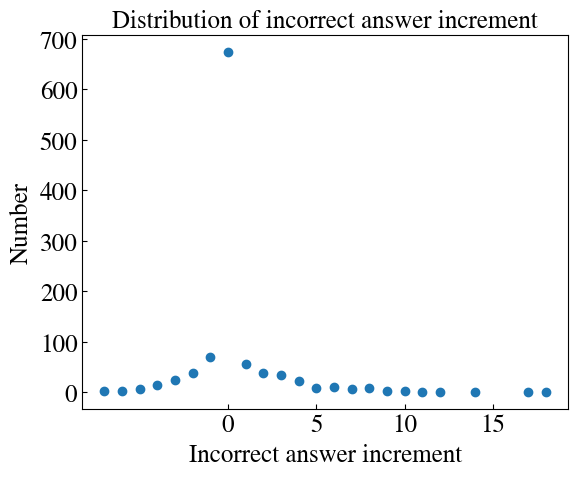

In [327]:
fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Distribution of incorrect answer increment', fontproperties=prop)
ax.set_xlabel('Incorrect answer increment', fontproperties=prop)
ax.set_ylabel('Number', fontproperties=prop)
ax.set_xticks(range(0, 21, 5))
ax.set_xticklabels(np.arange(0, 21, 5), font_properties=prop)
ax.set_yticks(np.arange(0, 701, 100))
ax.set_yticklabels(np.arange(0, 701, 100), font_properties=prop)
ax.scatter(miss_arr_uni[0], miss_arr_uni[1])

plt.show()

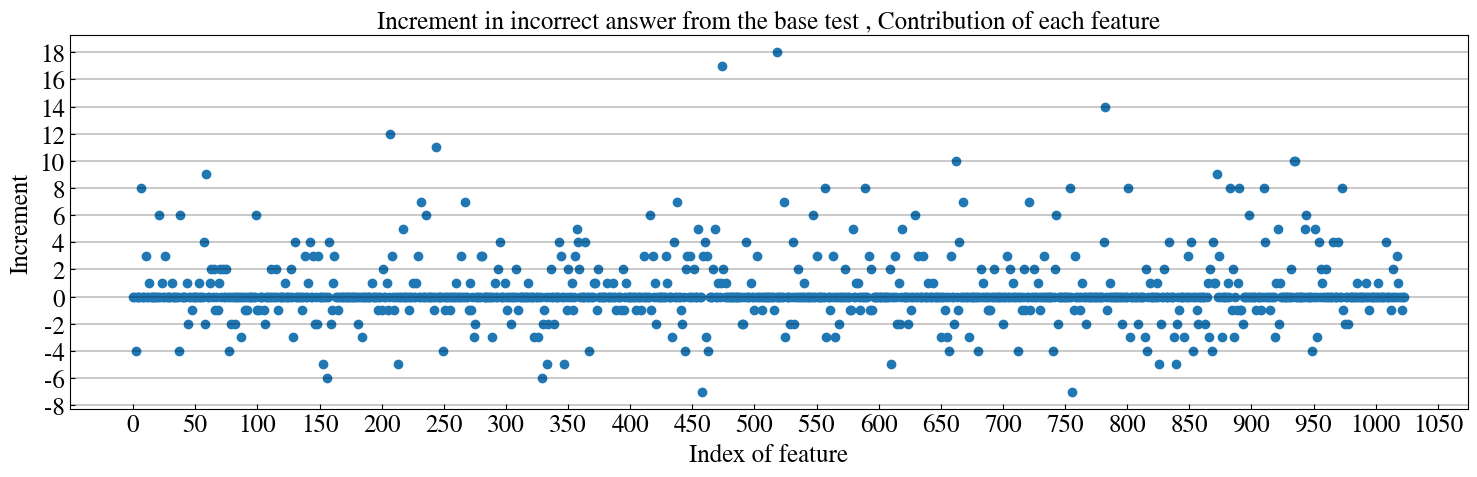

In [328]:
fig , ax = plt.subplots(figsize=(15, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Increment in incorrect answer from the base test , Contribution of each feature', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Increment', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
ax.set_yticks(np.arange(-10, 20, 2))
ax.set_yticklabels(np.arange(-10, 20, 2), font_properties=prop)
ax.scatter(np.arange(1024), miss_arr)
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

In [13]:
figure_category = Path('FeatureSelection/toZero_eachFeature/' + ax.get_title()) #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / figure_category
# print(save_dir)
save_dir.mkdir(exist_ok=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/FeatureSelection/toZero_eachFeature/Increment in incorrect answer from the base test , Contribution of each feature/2021-11-09_18-24.pdf


In [271]:
pprint(base_accuracy['total'].loc[0])

0.9231677617599948


# シード0とシード1の結果を同時に見る

In [7]:
#Path確認
pprint(os.listdir(FILE_DIR))
pprint(os.listdir(FILE_DIR/'seed0'/'FeatureSelection_toZero_oneFeature'))
pprint(os.listdir(FILE_DIR/'seed1'/'FeatureSelection_toZero_oneFeature'))


['seed2', 'seed1', 'seed0']
['2021-11-02_11-13.csv',
 '2021-11-04_11-22.csv',
 '2021-11-01_11-35.csv',
 '2021-11-04_11-27.csv',
 '2021-11-08_12-33.csv']
['2021-11-08_12-10.csv', '2021-11-08_12-35.csv']


In [10]:
df_read_0 = pd.read_csv(FILE_DIR/'seed0'/'FeatureSelection_toZero_oneFeature'/'2021-11-08_12-33.csv')
pprint(df_read_0)

df_read_1 = pd.read_csv(FILE_DIR/'seed1'/'FeatureSelection_toZero_oneFeature'/'2021-11-08_12-35.csv')
pprint(df_read_1)

         total  airplane   bathtub  bed  bench  bookshelf    bottle  bowl  \
0     0.923200       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
1     0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
2     0.924819       1.0  0.989362  1.0   0.70   0.953342  0.970854  0.90   
3     0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
4     0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
...        ...       ...       ...  ...    ...        ...       ...   ...   
1020  0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
1021  0.923507       1.0  0.978723  1.0   0.75   0.953342  0.950328  0.95   
1022  0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   
1023  0.923184       1.0  0.989362  1.0   0.70   0.953342  0.970854  0.90   
1024  0.923168       1.0  0.989362  1.0   0.70   0.953342  0.958949  0.90   

      car     chair  ...      sofa  stairs  stool     table  tent    toilet

In [11]:
# miss_arr_0 = (df_read_0['total'].loc[1024] - df_read_0['total'].loc[:1023])*1024
miss_arr_0 = (df_read_0['total'].loc[1024] - df_read_0['total'].loc[:1023])*2468
pprint(miss_arr_0)
miss_arr_0 = miss_arr_0.to_numpy()
print(miss_arr_0)
print(type(miss_arr_0))
miss_arr_0 = np.round(miss_arr_0)
print(miss_arr_0)

# miss_arr_0 = (df_read_0['total'].loc[1024] - df_read_0['total'].loc[:1023])*1024
miss_arr_1 = (df_read_1['total'].loc[1024] - df_read_1['total'].loc[:1023])*2468
pprint(miss_arr_1)
miss_arr_1 = miss_arr_1.to_numpy()
print(miss_arr_1)
print(type(miss_arr_1))
miss_arr_1 = np.round(miss_arr_1)
print(miss_arr_1)

0      -0.080677
1       0.000000
2      -4.074205
3       0.000000
4       0.000000
          ...   
1019    0.000000
1020    0.000000
1021   -0.837027
1022    0.000000
1023   -0.040339
Name: total, Length: 1024, dtype: float64
[-0.08067732  0.         -4.07420483 ... -0.83702723  0.
 -0.04033866]
<class 'numpy.ndarray'>
[-0.  0. -4. ... -1.  0. -0.]
0      -2.077441
1       0.000000
2      -3.116162
3       0.000000
4       0.000000
          ...   
1019    0.000000
1020    0.000000
1021   -5.909614
1022    0.000000
1023    4.033866
Name: total, Length: 1024, dtype: float64
[-2.07744108  0.         -3.11616162 ... -5.90961394  0.
  4.03386617]
<class 'numpy.ndarray'>
[-2.  0. -3. ... -6.  0.  4.]


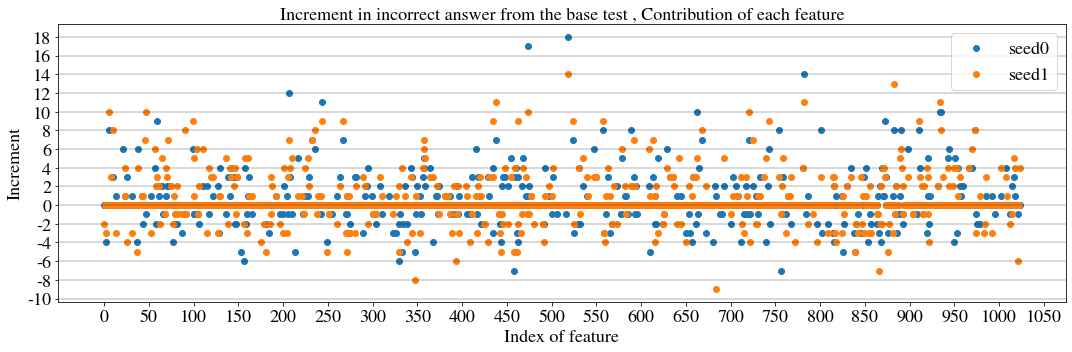

In [12]:
fig , ax = plt.subplots(figsize=(15, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Increment in incorrect answer from the base test , Contribution of each feature', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Increment', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
ax.set_yticks(np.arange(-10, 20, 2))
ax.set_yticklabels(np.arange(-10, 20, 2), font_properties=prop)
ax.scatter(np.arange(1024), miss_arr_0, label="seed0")
ax.scatter(np.arange(1024), miss_arr_1, label="seed1")
ax.legend(loc='upper right', prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

In [426]:
pprint(np.unique(miss_arr_0, return_counts=True))
miss_arr_0_uni = np.unique(miss_arr_0, return_counts=True)
# miss_arr_0_uni[1][7] = 0
# pprint(miss_arr_0_uni)
print(np.sum(miss_arr_0_uni[0]*miss_arr_0_uni[1]))
# print(np.where(miss_arr_0 > 0))
print("The number of features making a positive contribution", len(np.where(miss_arr_0 > 0)[0]))
# slack_notify("The number of features making a positive contribution:" + str(len(np.where(miss_arr_0 > 0)[0])))
print("The number of features making a negative contribution", len(np.where(miss_arr_0 < 0)[0]))
print("Index of features making a positive contribution", np.where(miss_arr_0 > 0)[0])
# slack_notify("Index of features making a positive contribution"+ str(np.where(miss_arr_0 > 0)[0]))
print("Index of features making a negative contribution", np.where(miss_arr_0 < 0)[0])

(array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.,  8.,  9., 10., 11., 12., 14., 17., 18.]),
 array([  2,   2,   7,  15,  24,  38,  69, 673,  56,  38,  34,  22,   9,
        10,   6,   9,   2,   3,   1,   1,   1,   1,   1]))
323.0
The number of features making a positive contribution 194
The number of features making a negative contribution 157
Index of features making a positive contribution [   6   10   13   21   23   26   31   38   43   53   57   59   62   63
   65   69   70   72   75   99  111  115  122  127  130  138  141  142
  145  149  158  161  162  192  201  204  207  208  217  225  228  229
  232  236  244  260  264  267  271  280  281  291  294  295  299  308
  318  336  343  344  350  353  356  357  358  359  364  371  372  374
  381  386  394  397  411  416  418  420  429  430  435  438  445  446
  448  451  455  459  460  462  467  468  471  473  474  475  477  493
  497  502  518  524  531  535  540  547  550  557  563  573  579  5

In [427]:
pprint(np.unique(miss_arr_1, return_counts=True))
miss_arr_1_uni = np.unique(miss_arr_1, return_counts=True)
# miss_arr_1_uni[1][7] = 0
# pprint(miss_arr_1_uni)
print(np.sum(miss_arr_1_uni[0]*miss_arr_1_uni[1]))
# print(np.where(miss_arr_1 > 0))
print("The number of features making a positive contribution", len(np.where(miss_arr_1 > 0)[0]))
# slack_notify("The number of features making a positive contribution:" + str(len(np.where(miss_arr_1 > 0)[0])))
print("The number of features making a negative contribution", len(np.where(miss_arr_1 < 0)[0]))
print("Index of features making a positive contribution", np.where(miss_arr_1 > 0)[0])
# slack_notify("Index of features making a positive contribution"+ str(np.where(miss_arr_1 > 0)[0]))
print("Index of features making a negative contribution", np.where(miss_arr_1 < 0)[0])

(array([-9., -8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10., 11., 13., 14.]),
 array([  1,   1,   1,   2,  10,  14,  34,  34,  38, 671,  48,  39,  44,
        31,  16,   8,   8,   6,   9,   4,   3,   1,   1]))
445.0
The number of features making a positive contribution 218
The number of features making a negative contribution 135
Index of features making a positive contribution [   6    8   10   23   24   38   43   44   46   47   57   58   59   62
   65   69   70   72   75   78   82   90   99  100  101  104  106  111
  117  120  122  129  130  136  141  142  145  146  149  158  161  162
  165  187  188  192  201  205  207  208  210  217  221  225  228  229
  232  236  239  242  244  264  267  272  274  281  289  291  308  310
  326  330  333  336  343  349  356  357  358  359  364  367  372  381
  384  391  395  404  405  416  418  420  421  430  434  435  438  448
  455  459  462  468  471  474  477  493  497  500  502  518  524  5

In [428]:
positive_index_seed0 = np.where(miss_arr_0 > 0)[0]
negative_index_seed0 = np.where(miss_arr_0 < 0)[0]
positive_index_seed1 = np.where(miss_arr_1 > 0)[0]
negative_index_seed1 = np.where(miss_arr_1 < 0)[0]

In [430]:
common_positive = np.intersect1d(positive_index_seed0, positive_index_seed1)
pprint(len(positive_index_seed0))
pprint(len(positive_index_seed1))
pprint(common_positive)
pprint(len(common_positive))

194
218
array([   6,   10,   23,   38,   43,   57,   59,   62,   65,   69,   70,
         72,   75,   99,  111,  122,  130,  141,  142,  145,  149,  158,
        161,  162,  192,  201,  207,  208,  217,  225,  228,  229,  232,
        236,  244,  264,  267,  281,  291,  308,  336,  343,  356,  357,
        358,  359,  364,  372,  381,  416,  418,  420,  430,  435,  438,
        448,  455,  459,  462,  468,  471,  474,  477,  493,  497,  502,
        518,  524,  531,  535,  540,  547,  550,  557,  563,  579,  582,
        589,  592,  609,  613,  616,  629,  632,  636,  658,  662,  668,
        693,  703,  708,  717,  721,  725,  733,  743,  754,  758,  764,
        781,  782,  801,  815,  830,  834,  851,  870,  871,  872,  883,
        885,  889,  890,  898,  910,  911,  921,  932,  934,  935,  943,
        944,  951,  954,  956,  966,  970,  973,  985, 1002, 1008, 1017,
       1018])
133


In [431]:
common_negative = np.intersect1d(negative_index_seed0, negative_index_seed1)
pprint(len(negative_index_seed0))
pprint(len(negative_index_seed1))
pprint(common_negative)
pprint(len(common_negative))

157
135
array([   2,   37,   68,   77,   79,   87,   92,  105,  148,  156,  160,
        181,  197,  200,  249,  251,  270,  275,  301,  304,  323,  329,
        339,  347,  389,  393,  409,  417,  441,  442,  444,  458,  461,
        463,  490,  491,  525,  532,  558,  568,  615,  624,  626,  650,
        700,  715,  722,  756,  762,  796,  809,  827,  839,  840,  842,
        853,  857,  863,  866,  876,  884,  893,  904,  915,  922,  974,
       1012, 1021])
68


# 特徴ベクトル

In [8]:
fv_df = pd.read_csv(FILE_DIR/'seed0/Feature_vector'/'2021-11-13_17-55.csv')

In [24]:
pprint(fv_df)

             0    1         2    3             4             5         6  \
0     0.696760  0.0  0.478282  0.0  4.359542e-39  1.027233e-39  1.251312   
1     0.811220  0.0  1.012739  0.0  4.359542e-39  1.027233e-39  0.844278   
2     0.946411  0.0  0.448928  0.0  4.359542e-39  1.027233e-39  1.161010   
3     0.534997  0.0  0.684391  0.0  4.359542e-39  1.027233e-39  0.799873   
4     0.813145  0.0  0.518256  0.0  4.359542e-39  1.027233e-39  1.325008   
...        ...  ...       ...  ...           ...           ...       ...   
2463  0.336226  0.0  0.764087  0.0  4.359542e-39  1.027233e-39  0.889634   
2464  0.283713  0.0  0.444725  0.0  4.359542e-39  1.027233e-39  0.721362   
2465  0.466371  0.0  0.338027  0.0  4.359542e-39  1.027233e-39  0.731296   
2466  0.770044  0.0  0.458055  0.0  4.359542e-39  1.027233e-39  0.771520   
2467  0.212431  0.0  0.780299  0.0  4.359542e-39  1.027233e-39  0.763709   

             7         8             9  ...      1014          1015  \
0     0.456311  

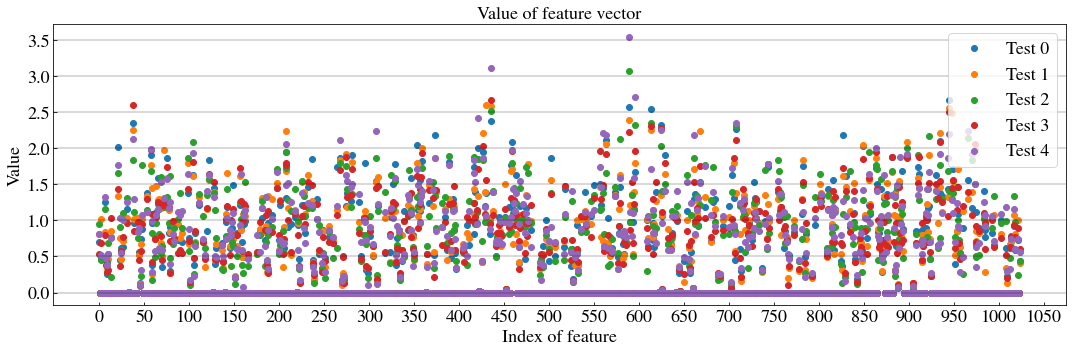

In [23]:
fig , ax = plt.subplots(figsize=(15, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Value of feature vector', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Value', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
ax.set_yticks(np.arange(-10, 20, 0.5))
ax.set_yticklabels(np.arange(-10, 20, 0.5), font_properties=prop)
for i in range(5):
    ax.scatter(np.arange(1024), fv_df.loc[i], label="Test " + str(i))
# ax.scatter(np.arange(1024), miss_arr_1, label="seed1")
ax.legend(loc='upper right', prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

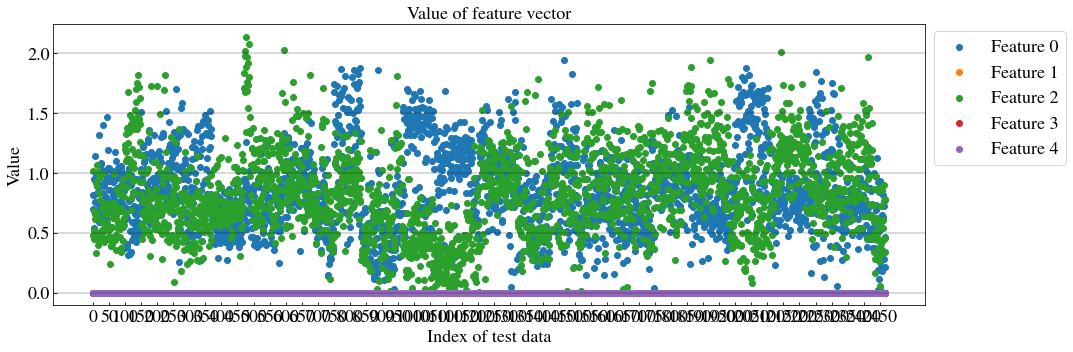

In [118]:
fig , ax = plt.subplots(figsize=(15, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Value of feature vector', fontproperties=prop)
ax.set_xlabel('Index of test data', fontproperties=prop)
ax.set_ylabel('Value', fontproperties=prop)
ax.set_xticks(range(0, 2500, 50))
ax.set_xticklabels(np.arange(0, 2500, 50), font_properties=prop)
ax.set_yticks(np.arange(-10, 20, 0.5))
ax.set_yticklabels(np.arange(-10, 20, 0.5), font_properties=prop)
for i in range(5):
    ax.scatter(np.arange(2468), fv_df.loc[0:, [str(i)]], label="Feature " + str(i))
# ax.scatter(np.arange(2468), fv_df.loc[0:, [str(4)]], label="Feature " + str(4))
# ax.scatter(np.arange(1024), miss_arr_1, label="seed1")
ax.legend(loc=(1.01, 0.5), prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

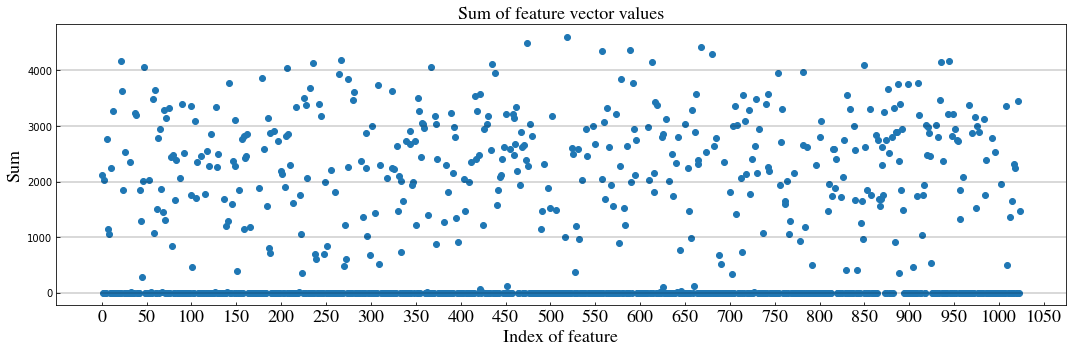

In [47]:
fig , ax = plt.subplots(figsize=(15, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Sum of feature vector values', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Sum', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
# ax.set_yticks(np.arange(-10, 20, 0.5))
# ax.set_yticklabels(np.arange(-10, 20, 0.5), font_properties=prop)

ax.scatter(np.arange(1024), sum_each_feature)
# ax.legend(loc='upper right', prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

In [121]:
# print(np.where(sum_each_feature ))
print("x = 0: ", len(np.where(sum_each_feature == 0)[0]))
print("0 < x < 1: ", len(np.where( (sum_each_feature > 0) & (sum_each_feature < 1))[0]))
print("1 < x < 100: ", len(np.where((sum_each_feature >= 1) & (sum_each_feature < 100))[0]))
print("100 < x < 1000: ", len(np.where((sum_each_feature >= 100) & (sum_each_feature < 1000))[0]))
print("1000 < x < 2000: ", len(np.where((sum_each_feature >= 1000) & (sum_each_feature < 2000))[0]))
print("2000 < x < 3000: ",len(np.where((sum_each_feature >= 2000) & (sum_each_feature < 3000))[0]))
print("3000 < x < 4000: ",len(np.where((sum_each_feature >= 3000) & (sum_each_feature < 4000))[0]))
print("4000 < x: ",len(np.where(sum_each_feature >= 4000)[0]))

x = 0:  298
0 < x < 1:  292
1 < x < 100:  14
100 < x < 1000:  39
1000 < x < 2000:  102
2000 < x < 3000:  167
3000 < x < 4000:  95
4000 < x:  17


In [70]:
num_class = 40

In [81]:
idx = np.where(target == 0)[0]
print(idx)
pprint(len(fv_df.values[idx]))
print(np.sum(fv_df.values[idx], axis=0))
print(len(np.sum(fv_df.values[idx], axis=0)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
100
[88.52869546  0.         60.6858943  ... 76.04972975  0.
 49.07984021]
1024


In [82]:
# /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Files/seed0/target/2021-11-13_17-14.csv

target = pd.read_csv(FILE_DIR/'seed0/target'/'2021-11-13_17-14.csv')
target = target.values

#各特徴ベクトルそれぞれがクラスごとに特徴があるのではないか？
sum_fv_each_class = np.zeros((num_class, columns))

for i in range(num_class):
    idx = np.where(target == i)[0]
    sum_fv_each_class[i] = np.sum(fv_df.values[idx], axis=0)

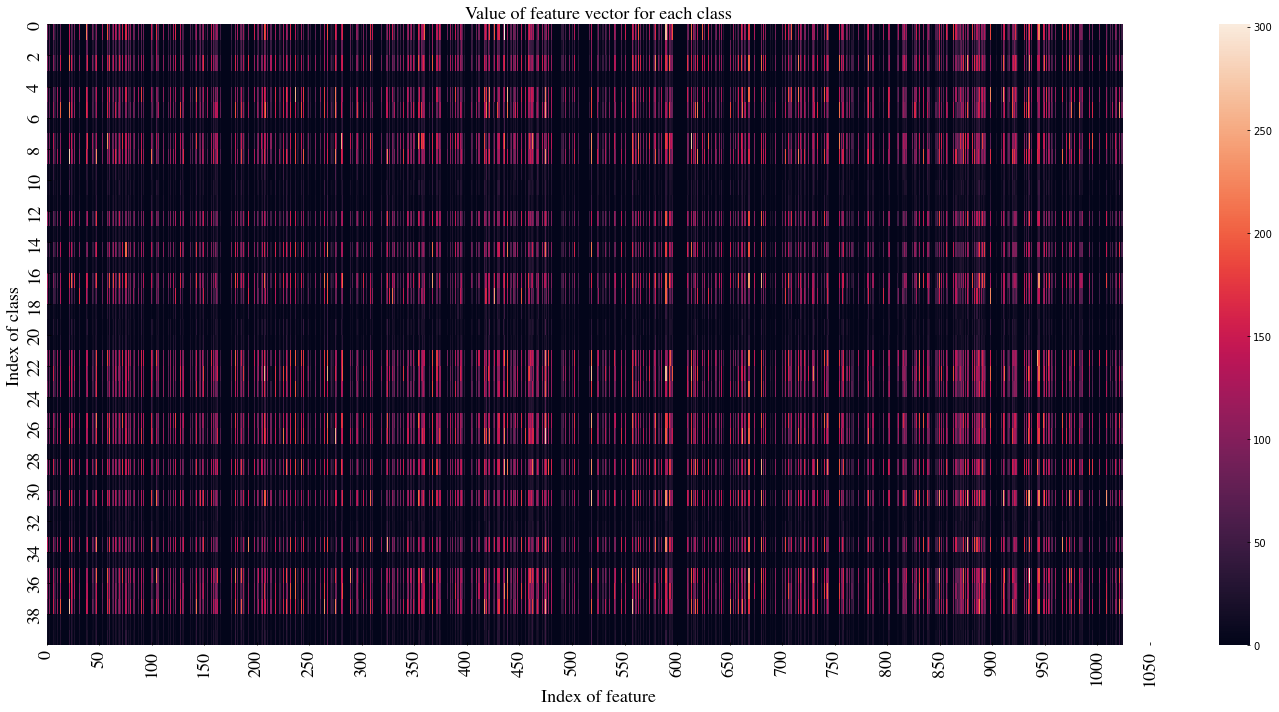

In [115]:
fig , ax = plt.subplots(figsize=(20, 10), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# index = 
# columns = len(fv_df.columns)
df = pd.DataFrame(data=sum_fv_each_class)

# sns.heatmap(df.loc[18:20,list(range(100))])
sns.heatmap(df)

ax.set_title('Value of feature vector for each class', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Index of class', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
ax.set_yticks(np.arange(0, 40, 2))
ax.set_yticklabels(np.arange(0, 40, 2), font_properties=prop)

# ax.scatter(np.arange(1024), sum_each_feature)
# ax.legend(loc='upper right', prop=prop)
# plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

In [119]:
figure_category = Path('FeatureVector/' + ax.get_title()) #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / figure_category
# print(save_dir)
save_dir.mkdir(exist_ok=True, parents=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/FeatureVector/Value of feature vector/2021-11-17_13-36.pdf


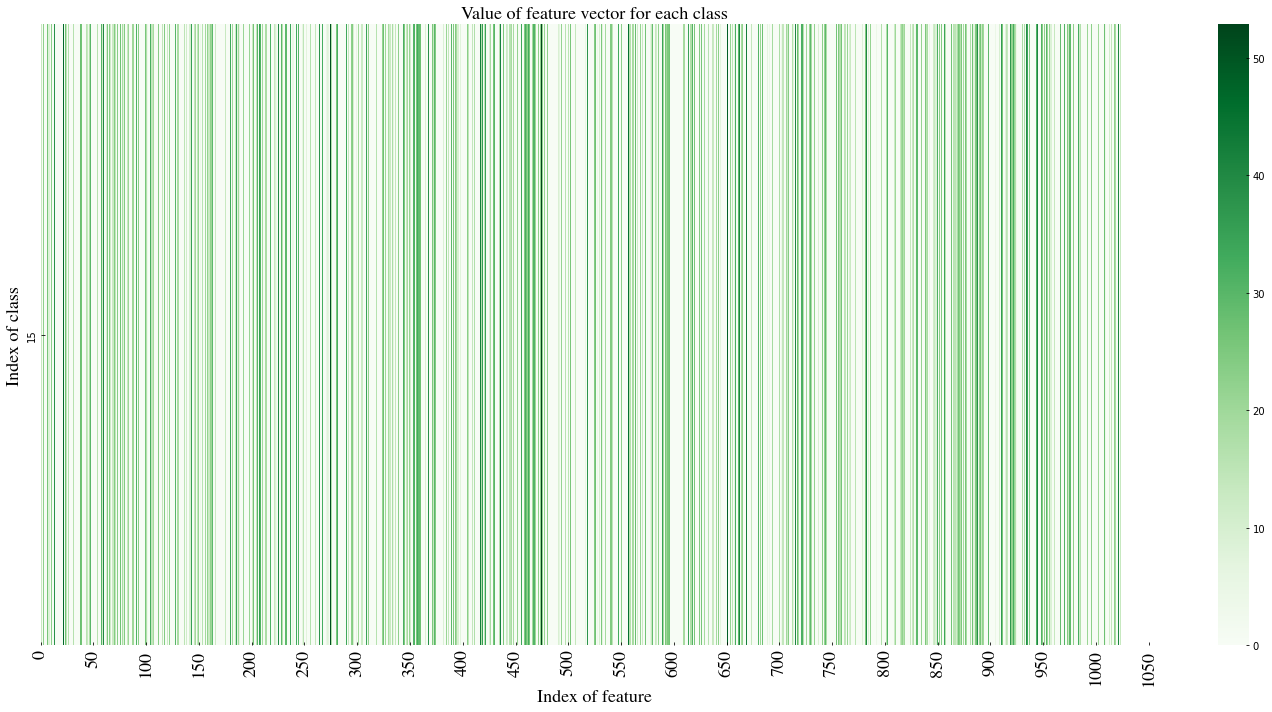

In [114]:
fig , ax = plt.subplots(figsize=(20, 10), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

df = pd.DataFrame(data=sum_fv_each_class)

sns.heatmap(df.loc[15:15], cmap="Greens")

ax.set_title('Value of feature vector for each class', fontproperties=prop)
ax.set_xlabel('Index of feature', fontproperties=prop)
ax.set_ylabel('Index of class', fontproperties=prop)
ax.set_xticks(range(0, 1051, 50))
ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
# ax.set_yticks(np.arange(0, 40, 2))
# ax.set_yticklabels(np.arange(0, 40, 2), font_properties=prop)


plt.show()

In [109]:
print("classes:" , classes , "\n")

classes: {'airplane': 0, 'bathtub': 1, 'bed': 2, 'bench': 3, 'bookshelf': 4, 'bottle': 5, 'bowl': 6, 'car': 7, 'chair': 8, 'cone': 9, 'cup': 10, 'curtain': 11, 'desk': 12, 'door': 13, 'dresser': 14, 'flower_pot': 15, 'glass_box': 16, 'guitar': 17, 'keyboard': 18, 'lamp': 19, 'laptop': 20, 'mantel': 21, 'monitor': 22, 'night_stand': 23, 'person': 24, 'piano': 25, 'plant': 26, 'radio': 27, 'range_hood': 28, 'sink': 29, 'sofa': 30, 'stairs': 31, 'stool': 32, 'table': 33, 'tent': 34, 'toilet': 35, 'tv_stand': 36, 'vase': 37, 'wardrobe': 38, 'xbox': 39} 



# GA特徴選択の結果

In [126]:
print(os.listdir(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'ngen100'/'log'/'2021-11-20_17-08.csv'))

['2021-11-20_17-08.csv']


In [135]:
log_df = pd.read_csv(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'ngen1000'/'log'/'2021-11-21_12-41.csv')

pprint(log_df)

       gen  nevals       avg       std       min       max
0        0       0  0.588155  0.217391  0.148298  0.766613
1        1      21  0.550203  0.199574  0.149919  0.766613
2        2      14  0.659792  0.166583  0.155186  0.771475
3        3      13  0.698204  0.118371  0.391005  0.771475
4        4      12  0.699136  0.142767  0.258104  0.778363
...    ...     ...       ...       ...       ...       ...
996    996      23  0.823379  0.157979  0.329822  0.903971
997    997      16  0.808360  0.146043  0.317666  0.903971
998    998      23  0.761359  0.185277  0.264587  0.903971
999    999      18  0.789911  0.150136  0.293760  0.903971
1000  1000      22  0.774595  0.193124  0.198136  0.904376

[1001 rows x 6 columns]


In [170]:
import math
def round_k(number, k):
    if number == 0:
        return 0
    return round(number, k - math.ceil(math.log10(abs(number))))

In [171]:

print(step_x)
print(round_k(step_y, 2))

number = 0.0000479453743

print(round_k(number, 3))

100.0
0.014
4.79e-05


In [180]:
print(round_k(min(y), 2))
print(round_k(max(y), 2))
print(np.arange(round_k(min(y), 2), round_k(max(y), 2) + step_y, step_y))

0.77
0.9
[0.77  0.784 0.798 0.812 0.826 0.84  0.854 0.868 0.882 0.896 0.91 ]


/tmp/ipykernel_890/45563020.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, font_properties=prop_mini)
/tmp/ipykernel_890/45563020.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, font_properties=prop_mini)


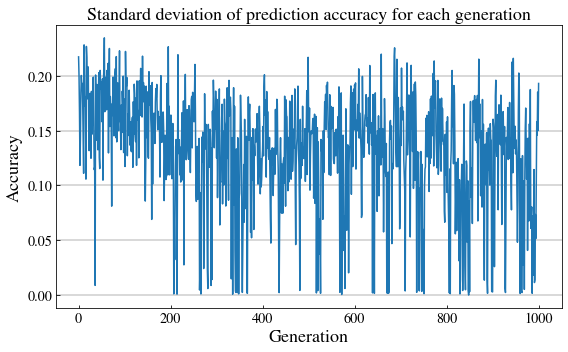

In [230]:
fig , ax = plt.subplots(figsize=(8, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

x = log_df.iloc[:,0]
y = log_df.iloc[:,3]

ax.set_title('Standard deviation of prediction accuracy for each generation', fontproperties=prop)
ax.set_xlabel('Generation', fontproperties=prop)
ax.set_ylabel('Accuracy', fontproperties=prop)
# x_arr = np.arange(0, 1051, 100).astype("int")
# y_arr = np.arange(0.76, 0.92, 0.02).astype("float32")

# ax.set_xticks(x_arr)
# ax.set_xticklabels(x_arr, font_properties=prop)
# ax.set_yticks(y_arr)
# ax.set_yticklabels(y_arr, font_properties=prop)


ax.plot(x, y)
# ax.legend(loc='upper right', prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')

fig.canvas.draw()
x_labels = [item.get_text() for item in ax.get_xticklabels()]
y_labels = [item.get_text() for item in ax.get_yticklabels()]

# ax.set_xticks(ax.get_x_ticks())
ax.set_xticklabels(x_labels, font_properties=prop_mini)
# ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(y_labels, font_properties=prop_mini)


plt.show()

In [231]:
figure_category = Path('FeatureSelection_GA/' + ax.get_title()) #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / figure_category
# print(save_dir)
save_dir.mkdir(exist_ok=True, parents=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/FeatureSelection_GA/Standard deviation of prediction accuracy for each generation/2021-11-21_16-00.pdf


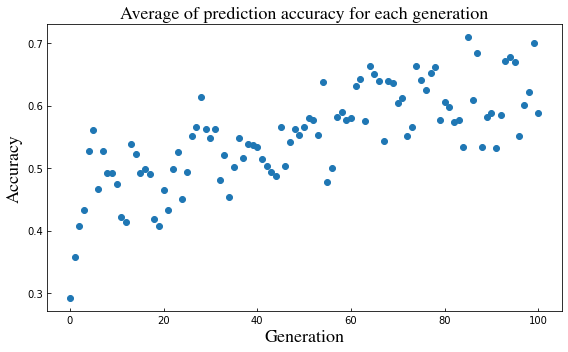

In [131]:
fig , ax = plt.subplots(figsize=(8, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Average of prediction accuracy for each generation', fontproperties=prop)
ax.set_xlabel('Generation', fontproperties=prop)
ax.set_ylabel('Accuracy', fontproperties=prop)
# ax.set_xticks(range(0, 1051, 50))
# ax.set_xticklabels(np.arange(0, 1051, 50), font_properties=prop)
# ax.set_yticks(np.arange(-10, 20, 0.5))
# ax.set_yticklabels(np.arange(-10, 20, 0.5), font_properties=prop)

ax.scatter(log_df.iloc[:,0], log_df.iloc[:,2])
# ax.legend(loc='upper right', prop=prop)
# plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()

In [486]:
hof_list = os.listdir(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'Hall of fame'/'Tournament')
hof_list = [s for s in hof_list if '512' in s]
# log_list = [s for s in log_list if 'seed0' in s]
hof_list.sort()
pprint(hof_list)

['ngen1000_select512_seed0_2021-11-24_00-45.csv',
 'ngen1000_select512_seed1_2021-11-25_03-56.csv',
 'ngen1000_select512_seed2_2021-11-25_07-40.csv',
 'ngen1000_select512_seed3_2021-11-25_11-19.csv']


In [489]:
hof_df_list = []
for i in range(4):
    file_name = hof_list[i]
    hof_df = pd.read_csv(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'Hall of fame'/'Tournament'/file_name)
    hof_df_list.append(hof_df)

pprint(hof_df_list)

[        0    1    2    3    4    5    6    7    8    9  ...  1014  1015  1016  \
0     1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
1     1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
2     1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
3     1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
4     1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
1122  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
1123  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
1124  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
1125  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   
1126  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   1.0   0.0   0.0   

      1017  1018  1019  10

In [495]:
# df = hof_df_list[0]
# pprint(df.iloc[-1, :].values)

# hof_arr_list = [df.iloc[-1, :].values for df in hof_df_list]
pprint(hof_df_list)

[array([1., 0., 1., ..., 1., 1., 0.]),
 array([1., 0., 1., ..., 0., 1., 0.]),
 array([0., 1., 1., ..., 1., 1., 0.]),
 array([1., 0., 1., ..., 1., 0., 0.])]


In [503]:
hof_arrays = np.array(hof_df_list)
print(hof_arrays)
print(hof_arrays.shape)

[[1. 0. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]]
(4, 1024)


In [507]:
select_indices = np.where(hof_arrays == 1)
print(select_indices)
print(select_indices[0].shape)
select_indices = select_indices[1].reshape(4, 512)
pprint(select_indices)
# for l in select_indices:
#     print(len(l))
set_list = []
for arr in select_indices:
    set_si = set(arr)
    set_list.append(set_si)
print(set_list)

(array([0, 0, 0, ..., 3, 3, 3]), array([   0,    2,    3, ..., 1017, 1018, 1021]))
(2048,)
array([[   0,    2,    3, ..., 1020, 1021, 1022],
       [   0,    2,    7, ..., 1016, 1018, 1022],
       [   1,    2,    5, ..., 1019, 1021, 1022],
       [   0,    2,    3, ..., 1017, 1018, 1021]])
[{0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 17, 20, 21, 22, 23, 24, 25, 28, 30, 33, 34, 35, 36, 39, 40, 43, 47, 51, 53, 54, 58, 62, 63, 65, 67, 68, 71, 72, 73, 74, 75, 77, 78, 79, 82, 86, 88, 89, 90, 92, 95, 96, 97, 98, 99, 101, 103, 105, 106, 107, 109, 110, 111, 113, 115, 118, 119, 120, 121, 124, 130, 134, 135, 137, 138, 141, 142, 144, 146, 148, 149, 150, 151, 155, 161, 164, 167, 169, 170, 172, 174, 175, 177, 178, 180, 181, 184, 185, 192, 195, 197, 200, 201, 203, 204, 205, 207, 209, 210, 212, 213, 214, 215, 221, 223, 225, 226, 229, 233, 234, 235, 236, 238, 241, 244, 247, 249, 250, 251, 254, 256, 257, 259, 260, 261, 267, 272, 275, 278, 279, 280, 281, 282, 283, 284, 285, 287, 288, 291, 292, 294, 296, 298, 

In [517]:
for i in range(4):
    print("The number of common important index of seed{0} & seed{1}: {2}".format(i, (i+1) % 4, len(set_list[i] & set_list[(i+1) % 4])))
    
for i in range(4):
    print("The number of common important index of seed{0} & seed{1} & seed{2}: {3}".format(i, (i+1) % 4, (i+2) % 4 ,len(set_list[i] & set_list[(i+1) % 4] & set_list[(i+2) % 4])))
    
print(len(set_list[0] & set_list[1] & set_list[2] & set_list[3]))

The number of common important index of seed0 & seed1: 260
The number of common important index of seed1 & seed2: 266
The number of common important index of seed2 & seed3: 262
The number of common important index of seed3 & seed0: 256
The number of common important index of seed0 & seed1 & seed2: 135
The number of common important index of seed1 & seed2 & seed3: 134
The number of common important index of seed2 & seed3 & seed0: 139
The number of common important index of seed3 & seed0 & seed1: 134
70


In [462]:
# top100_list = []
top100_list.append(np.argsort(-feature_weight_128)[:100])
print(top100_list)

[array([922, 658, 662, 122, 609, 205, 367, 817, 934, 812, 568, 364, 617,
       602, 725, 357, 838,  79, 883, 308, 558, 994, 405, 844, 213, 195,
       895, 480, 893, 143, 969, 700, 853, 120, 100, 682, 347,  21, 349,
       153, 346, 272,  28, 749, 976, 785, 624, 404, 673, 871, 579, 420,
       255, 334, 352, 707,  14, 587, 832, 711, 897, 234, 713, 209, 391,
       686, 939, 335, 309, 118, 974, 863, 856, 468, 834, 849, 978, 867,
       445, 384,  87, 851, 371, 869, 826, 995, 162, 339, 525, 592, 680,
       629, 721, 796, 208,  10, 876, 354, 827,   6]), array([  77,  434,  758,  467,  372,  367,  359,   69,  857,  324,  130,
        323,  225,  922,  872,  594, 1021,  201,  595,  943,  497,  930,
        179,  531,  460,   44,   47,  547,  693,  624,  221,  217,  175,
        445,  389,  471,  142,   92,  188,  350,  970,  870,  935,  886,
        229,  579,  371,  740,  583,  535,  429,  684,  784,  613,  343,
        848,  122,  393,  192,  185,  810,  184,  934,   45,  440,   41,
   

In [478]:
set128  = set(top100_list[0])
print(len(set128))
set256 = set(top100_list[1])
print(len(set256))
set512 = set(top100_list[2])
print(len(set512))

slack_notify("128 & 256: {0}".format(set128 & set256))
slack_notify("128 & 512: {0}".format(set128 & set512))
slack_notify("256 & 512: {0}".format(set256 & set512))

slack_notify("128 & 256 & 512: {0}".format(set128 & set256 & set512))

100
100
100


In [406]:
hof_arr = hof_df.values
feature_weight = hof_arr.sum(axis=0)
feature_weight = feature_weight / hof_df.index.size
# print(hof_arr.shape)
# print()
pprint(np.argsort(-feature_weight))
pprint(np.sort(feature_weight)[-1:-128:-1])

array([   0,  518,  500, ...,  560,  767, 1023])
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])


In [400]:
def feature_vector_heatmap(feature_vector, font_path, title):
    prop = font_manager.FontProperties(fname=font_path, size=18)
    prop_mini = font_manager.FontProperties(fname=font_path, size=10)
    size = int(math.sqrt(feature_vector.shape[0]))
    feature_vector = feature_vector.reshape(size, size)
    fig , ax = plt.subplots(figsize=(8, 7), tight_layout=True)

#     plt.rcParams['xtick.direction'] = 'out'
#     plt.rcParams['ytick.direction'] = 'out'

    df = pd.DataFrame(data=feature_vector)

    sns.heatmap(df, cmap='Blues', linewidths=0.5)

    ax.set_title(title, fontproperties=prop)
    ax.set_xlabel('Index of feature', fontproperties=prop)
    ax.set_ylabel('Index of feature', fontproperties=prop)
    ax.set_xticks(range(0, size, 1))
    ax.set_xticklabels(np.arange(0, size, 1), font_properties=prop_mini)
    ax.set_yticks(np.arange(0, size, 1))
    ax.set_yticklabels(np.arange(0, size, 1), font_properties=prop_mini)

    return fig, ax

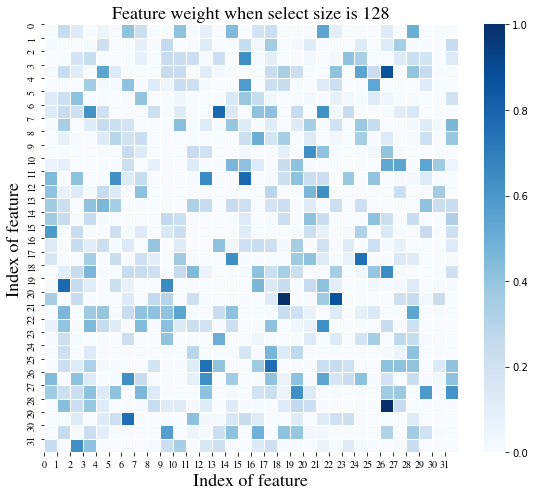

In [427]:
fig, ax = feature_vector_heatmap(feature_weight_128, font_path, 'Feature weight when select size is 128')

In [408]:
figure_category = Path('FeatureSelection_GA/' + ax.get_title()) #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / figure_category
# print(save_dir)
save_dir.mkdir(exist_ok=True, parents=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/FeatureSelection_GA/Feature weight when select size is 256/2021-11-27_15-40.pdf


No handles with labels found to put in legend.
/tmp/ipykernel_890/2743336514.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, font_properties=prop_mini)
/tmp/ipykernel_890/2743336514.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, font_properties=prop_mini)


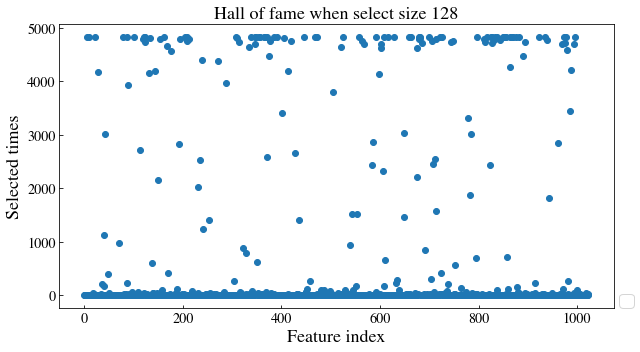

In [310]:
fig , ax = plt.subplots(figsize=(9, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Hall of fame when select size 128', fontproperties=prop)
ax.set_xlabel('Feature index', fontproperties=prop)
ax.set_ylabel('Selected times', fontproperties=prop)

x = np.arange(1024)
y = hof_arr_sum
ax.scatter(x, y)
 
ax.legend(loc=(1.01, 0), prop=prop)
# plt.grid(color='black', linewidth=0.3, axis='y')

fig.canvas.draw()
x_labels = [item.get_text() for item in ax.get_xticklabels()]
y_labels = [item.get_text() for item in ax.get_yticklabels()]

# ax.set_ylim(0, 1.0)
# ax.set_xticks(ax.get_x_ticks())
ax.set_xticklabels(x_labels, font_properties=prop_mini)
# ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(y_labels, font_properties=prop_mini)


plt.show()

In [295]:
# pprint(os.listdir(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'log'))
log_list = os.listdir(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'log')
# log_list = [s for s in log_list if 'seed0' in s]
log_list.sort()
pprint(log_list)

['ngen1000_selectsize128_seed0_2021-11-24_20-57.csv',
 'ngen1000_selectsize128_seed1_2021-11-25_14-58.csv',
 'ngen1000_selectsize128_seed2_2021-11-25_18-07.csv',
 'ngen1000_selectsize128_seed3_2021-11-25_21-11.csv',
 'ngen1000_selectsize256_seed0_2021-11-25_00-08.csv',
 'ngen1000_selectsize256_seed1_2021-11-26_00-30.csv',
 'ngen1000_selectsize256_seed2_2021-11-26_03-43.csv',
 'ngen1000_selectsize256_seed3_2021-11-26_06-59.csv',
 'ngen1000_selectsize512_seed0_2021-11-24_00-45.csv',
 'ngen1000_selectsize512_seed1_2021-11-25_03-56.csv',
 'ngen1000_selectsize512_seed2_2021-11-25_07-40.csv',
 'ngen1000_selectsize512_seed3_2021-11-25_11-19.csv']


In [281]:
log_df_list = []
log_df = pd.read_csv(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'log'/log_list[0])
print(log_list[0])
log_df_list.append(log_df)
log_df = pd.read_csv(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'log'/log_list[1])
print(log_list[1])
log_df_list.append(log_df)
log_df = pd.read_csv(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'log'/log_list[2])
print(log_list[2])
log_df_list.append(log_df)
# log_df = pd.read_csv(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'log'/log_list[8])
# print(log_list[8])
# log_df_list.append(log_df)

ngen1000_selectsize128_seed0_2021-11-24_20-57.csv
ngen1000_selectsize256_seed0_2021-11-25_00-08.csv
ngen1000_selectsize512_seed0_2021-11-24_00-45.csv


/tmp/ipykernel_890/3098804792.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, font_properties=prop_mini)
/tmp/ipykernel_890/3098804792.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, font_properties=prop_mini)


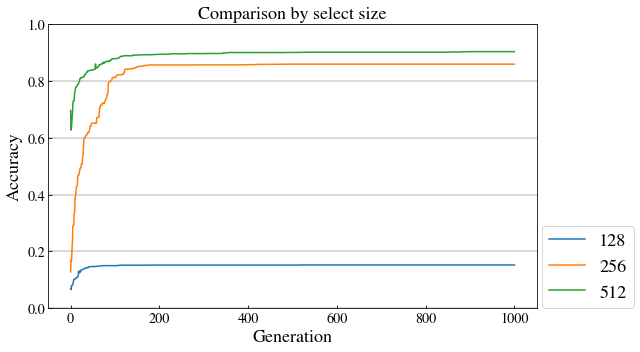

In [291]:
fig , ax = plt.subplots(figsize=(9, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

ax.set_title('Comparison by select size', fontproperties=prop)
ax.set_xlabel('Generation', fontproperties=prop)
ax.set_ylabel('Accuracy', fontproperties=prop)


# label = ['First model', 'Second model']
for i,log_df in zip(range(len(log_df_list)), log_df_list):
    x = log_df.iloc[:,0]
    y = log_df.iloc[:,5]
    ax.plot(x, y, label= str(2**(i+7)))
#     ax.plot(x, y, label=label[i])
# log_df = log_df_list[0]
# x = log_df.iloc[:,0]
# y = log_df.iloc[:,5]
# 

ax.legend(loc=(1.01, 0), prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')

fig.canvas.draw()
x_labels = [item.get_text() for item in ax.get_xticklabels()]
y_labels = [item.get_text() for item in ax.get_yticklabels()]

ax.set_ylim(0, 1.0)
# ax.set_xticks(ax.get_x_ticks())
ax.set_xticklabels(x_labels, font_properties=prop_mini)
# ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(y_labels, font_properties=prop_mini)


plt.show()

In [292]:
figure_category = Path('FeatureSelection_GA/' + ax.get_title()) #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / figure_category
# print(save_dir)
save_dir.mkdir(exist_ok=True, parents=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/FeatureSelection_GA/Comparison by select size/2021-11-25_12-07.pdf


# GAダウンサンプリングの結果

In [75]:
num_list = ['1980']　#1980:Sofa, 615:chair, 1510:person
# pprint(os.listdir(FILE_DIR/'seed0'/'FeatureSelection_toZero_GA'/'log'))
log_list = os.listdir(FILE_DIR/'seed0'/'GA_downsampling'/'log')
log_list = [s for s in log_list if 'data1980' in s]
log_list.sort()
pprint(log_list)

['data1980_ngen1000_rate0.03125_seed0_2021-12-27_12-31.csv',
 'data1980_ngen1000_rate0.0625_seed0_2021-12-26_23-22.csv',
 'data1980_ngen1000_rate0.125_seed0_2021-12-26_09-55.csv',
 'data1980_ngen1000_rate0.25_seed0_2021-12-25_20-36.csv',
 'data1980_ngen1000_rate0.5_seed0_2021-12-25_06-51.csv']


data1980_ngen1000_rate0.5_seed0_2021-12-25_06-51.csv


/tmp/ipykernel_800/3346235364.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, font_properties=prop_mini)
/tmp/ipykernel_800/3346235364.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels, font_properties=prop_mini)
/tmp/ipykernel_800/3346235364.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(y_labels, font_properties=prop_mini)


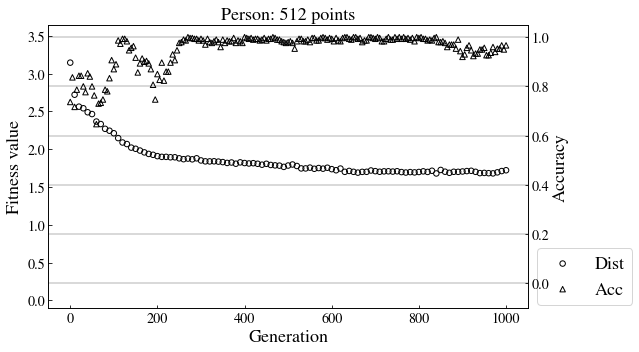

In [82]:
select_log = log_list[4]  #上のリストから見たいものを選択
title = "Sofa: 512 points" 
# print(select_log)
log_df = pd.read_csv(FILE_DIR/'seed0'/'GA_downsampling'/'log'/select_log)
# pprint(log_df)
print(select_log)


fig , ax1 = plt.subplots(figsize=(9, 5), tight_layout=True)
ax2 = ax1.twinx()

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# plt.title("Average_" + select_log, fontproperties=prop)
plt.title(title, fontproperties=prop)

ax1.set_xlabel('Generation', fontproperties=prop)
ax1.set_ylabel('Fitness value', fontproperties=prop)
ax2.set_ylabel('Accuracy', fontproperties=prop)

label = ['Dist', 'Acc']
x = np.arange(log_df.index.size)
y1 = log_df.iloc[:,0]
ax1.scatter(x[::10], y1[::10], label= label[0], s =30, color="Black", marker=marker_list[0], facecolor="None")
y2 = log_df.iloc[:,1]
ax2.scatter(x[::5], y2[::5], label= label[1], s =30, color="Black", marker=marker_list[1], facecolor="None")
# x[::10], y1[::10], label= label[i], s =30, color="Black", marker=marker_list[i], facecolor="None"

ax1.set_ylim( -0.1, max(y1)+0.5)
ax2.set_ylim(-0.1, 1.05)

fig.canvas.draw()
x_labels = [item.get_text() for item in ax1.get_xticklabels()]
y_labels = [item.get_text() for item in ax1.get_yticklabels()]

ax1.set_xticklabels(x_labels, font_properties=prop_mini)
ax1.set_yticklabels(y_labels, font_properties=prop_mini)

y_labels = [item.get_text() for item in ax2.get_yticklabels()]
ax2.set_yticklabels(y_labels, font_properties=prop_mini)

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=(1.02, 0.01), prop=prop)
# ax2.legend(loc=(1.01, 0.1), prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')


plt.show()
# plt.close()

# サンプリングテストの結果を表示

In [39]:
data_idx = 615
result_dir = FILE_DIR/'downsampling'
file_list = os.listdir(result_dir)
file_list = [s for s in file_list if 'data'+str(data_idx) in s]
file_list.sort()
pprint(file_list)

['minsize32_data615_2022-01-05_12-29.csv']


In [40]:
select_file = file_list[-1]
print(select_file)
file_df = pd.read_csv(result_dir/select_file)
pprint(file_df)

minsize32_data615_2022-01-05_12-29.csv
          0         1         2    3         4         5
0  0.999000  0.843667  0.503667  0.1  0.133333  0.000000
1  0.999333  0.999333  0.895667  0.3  0.133333  0.000000
2  0.999333  0.999333  0.994333  1.0  0.866667  0.733333


[32, 64, 128, 256, 512, 1024, 1024]


/tmp/ipykernel_800/3507332075.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, font_properties=prop_mini)
/tmp/ipykernel_800/3507332075.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels, font_properties=prop_mini)


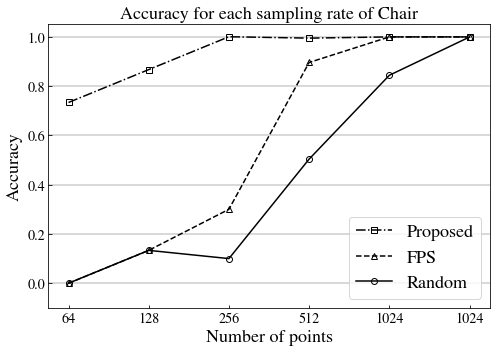

In [41]:
fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# plt.title("Accuracy for each sampling rate of Sofa " + str(data_idx), fontproperties=prop)
plt.title("Accuracy for each sampling rate of Chair", fontproperties=prop)

# ax.set_xlabel('Sampling rate', fontproperties=prop)
ax.set_xlabel('Number of points', fontproperties=prop)
ax.set_ylabel('Accuracy', fontproperties=prop)

rate_list = [1/2**k for k in range(6)]
rate_list = [1.0] + rate_list
rate_list = [int(i*1024) for i in rate_list]
rate_list = rate_list[::-1]
print(rate_list)
x = range(6)
labels = ['Random', 'FPS', "Proposed"]

for i in range(2, -1, -1):
    y = file_df.iloc[i,:]
#     x = x[::-1]
    y = y[::-1]
#     ax.scatter(x, y, label= labels[i], color="Black", marker=marker_list[i], facecolor="None")
    ax.plot(x, y, label= labels[i], color="Black", marker=marker_list[i], markerfacecolor="None", linestyle=line_styles[i])
#     ax.plot(x, y, color="Black", linestyle=line_styles[i], marker)
    ax.set_ylim(-0.1, 1.05)
# ax.set_xscale('log', basex=2)

fig.canvas.draw()
# x_labels = [item.get_text() for item in ax.get_xticklabels()]
x_labels = rate_list
y_labels = [item.get_text() for item in ax.get_yticklabels()]

ax.set_xticklabels(x_labels, font_properties=prop_mini)
ax.set_yticklabels(y_labels, font_properties=prop_mini)

handler, label = ax.get_legend_handles_labels()
ax.legend(handler, label, loc="lower right", prop=prop)
plt.grid(color='black', linewidth=0.3, axis='y')

plt.show()
plt.close()

In [42]:
figure_category = Path('GA_downsampling/' + ax.get_title()) #どういうfigureか
ext = ".pdf"
#-------------------------------------
save_dir = FIGURE_DIR / figure_category
# print(save_dir)
save_dir.mkdir(exist_ok=True, parents=True)
timestr = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M'))
# print(timestr)
figure_name = timestr + ext
fig.savefig(save_dir/figure_name)
print("Saved in:", save_dir/figure_name)
plt.close()

Saved in: /mnt/workspace/Github/Pointnet_Pointnet2_pytorch/Mywork/Results/Figures/GA_downsampling/Accuracy for each sampling rate of Chair/2022-01-11_22-26.pdf


In [101]:
numpoint_list = [2**i for i in range(4, 11, 1)]
print(numpoint_list)

[16, 32, 64, 128, 256, 512, 1024]
